In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import squarify


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df2 = pd.read_csv("/content/startup_funding (1).csv")

Sample of our dataset (startup_funding.csv)

In [ ]:
df2.head(3)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN


##Metadata

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


## Dimensions of DataFrame

In [ ]:
print("Rows:{Rows} in total and columns:{columns} in total".format(Rows = df2.shape[0], columns = df2.shape[1]))

Rows:2372 in total and columns:10 in total


##Cleaning Data

In [ ]:
df2.dtypes

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
Remarks             object
dtype: object

##Repersentation of missing data

####1.Since we can see that 'remarks' has the higher density of missing data,we can neglect this column
####2. Here we can use estimated statistical values of available data of attribute('AmountInUSD') to fill the missing values

In [ ]:
print("Frequency count of missing values")
df2.apply(lambda X:sum(X.isnull()))

Frequency count of missing values


SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

##Here yellow bars repersent the null values(missing values)

####x axis represents colums(features) of dataset

<Axes: >

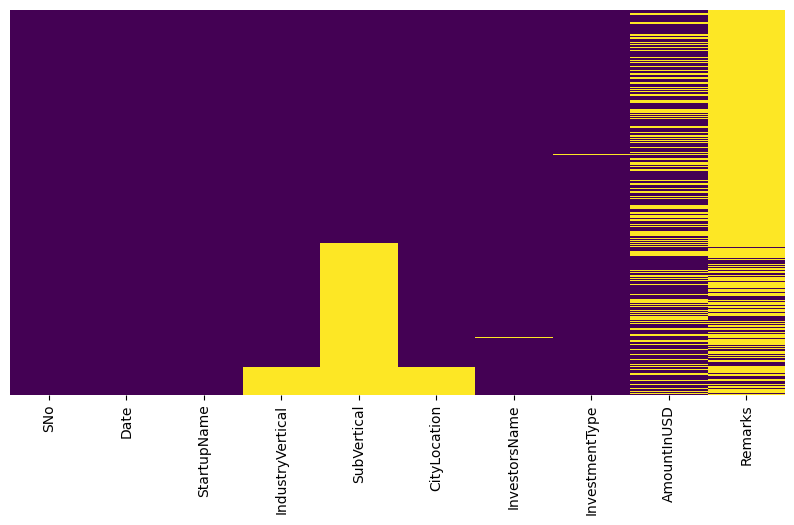

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df2.isnull(), cmap = 'viridis', yticklabels = False , cbar = False)

##Cleaning missing data and formatting
####Cities and IndustryVertical columns are interpolated but not with respect to avalaible data i.e.replacing missing data with 'NotSpecific' label and 'Other' respectively

In [ ]:
df2['CityLocation'] = df2['CityLocation'].fillna(value= 'NotSpecific')

In [ ]:
df2['IndustryVertical'] = df2['IndustryVertical'].fillna(value = 'Other')

In [ ]:
df2['CityLocation'].value_counts()

Bangalore             627
Mumbai                446
New Delhi             381
Gurgaon               240
NotSpecific           179
                     ... 
Pune / Dubai            1
Varanasi                1
Mumbai / UK             1
Jodhpur                 1
Dallas / Hyderabad      1
Name: CityLocation, Length: 72, dtype: int64

In [ ]:
import re
def convert_slash(x):
  x = x.lower()
  if re.search('/',x):
    return x.split('/')[0].strip()
  else:
    return x.strip()

df2['CityLocation'] = df2['CityLocation'].apply(convert_slash)

In [ ]:
import re
def convert_and(x):
  x = x.lower()
  if re.search('&',x):
    return x.split('&')[0].strip()
  else:
    return x.strip()

df2['CityLocation']= df2['CityLocation'].apply(convert_and)

In [ ]:
df2['CityLocation'].value_counts()

bangalore      635
mumbai         449
new delhi      385
gurgaon        241
notspecific    179
pune            91
noida           79
hyderabad       77
chennai         67
ahmedabad       35
jaipur          25
kolkata         19
chandigarh      10
vadodara         9
indore           9
goa              8
singapore        5
kanpur           4
delhi            4
coimbatore       3
bhopal           2
usa              2
siliguri         2
us               2
agra             2
udupi            2
gwalior          2
trivandrum       2
kochi            2
hubli            1
varanasi         1
udaipur          1
india            1
nagpur           1
new york         1
belgaum          1
boston           1
jodhpur          1
london           1
seattle          1
sfo              1
surat            1
lucknow          1
missourie        1
panaji           1
karur            1
kozhikode        1
kerala           1
dallas           1
Name: CityLocation, dtype: int64

## Renaming columns

In [ ]:
df2.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [ ]:
df2.set_index('SNo', inplace  = True )

In [ ]:
#df2.rename(columns = {
     #'Date dd/mm/yyyy':'date',
    #'InvestorsName':'investors',
    #'InvestmentnType':'round',
    #'AmountInUSD':'amount'
#}, inplace = True)

##Deleting Insignificant columns
Here as we can see that 'Remarks column has very high missing data frequency so "Remarks" column is not useful and will create bias in analysis
Serial number is not useful and hence deleted as data is organised according to Date column

In [ ]:
## Dropping the Remarks columns
df2.drop(columns = ['Remarks'], inplace = True)

##Investment type column has repeated values of categories
Categories have alphabetical error
This column has unformatted categories which results in repetition error(spaces between words) Extra spaces in categories of Investment type will create duplicate categories For example Here -'Seed Funding' and 'SeedFunding' are same and can cause data duplicacy

In [ ]:
df2.columns

Index(['Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [ ]:
#df2['InvestmentnType']= df2['InvestmentnType'].replace('\\','',regex = True)
df2['InvestmentType'].replace('/', '', regex=True, inplace= True)
df2['InvestmentType'].replace(r"Seed\\\\nFunding", 'Seed Funding"', regex=True, inplace= True)
df2['InvestmentType'].replace('Private\\nEquity', 'Private Equity ', regex=True, inplace= True)
#re.compile(r"Seed\\\\nFunding", re.IGNORECASE)
#f['pricing'].replace(to_replace="\$([0-9,\.]+).*", value=r"\1", regex=True, inplace=True)

In [ ]:
df2['InvestmentType'].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
PrivateEquity        1
Crowd funding        1
Crowd Funding        1
Name: InvestmentType, dtype: int64

##Fomatting dates to time series

In [ ]:
df2['Date'] = df2['Date'].str.replace('05/072018','05/07/2018')
df2['Date'] = pd.to_datetime(df2['Date'], errors = 'coerce')

<ipython-input-23-c873365fa90b>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df2.columns

Index(['Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [ ]:
import re

# If you need to use the regex more than once it is suggested to compile it.
pattern = re.compile(r"</{0,}\[\d+>")

# <\/{0,}\[\d+>
#
# Match the character “<” literally «<»
# Match the character “/” literally «\/{0,}»
#    Between zero and unlimited times, as many times as possible, giving back as needed (greedy) «{0,}»
# Match the character “[” literally «\[»
# Match a single digit 0..9 «\d+»
#    Between one and unlimited times, as many times as possible, giving back as needed (greedy) «+»
# Match the character “>” literally «>»

subject = """this is a paragraph with<[1> in between</[1> and then there are cases ... where the<[99> number ranges from 1-100</[99>.
and there are many other lines in the txt files
with<[3> such tags </[3>"""

result = pattern.sub("", subject)

print(result)

this is a paragraph with in between and then there are cases ... where the number ranges from 1-100.
and there are many other lines in the txt files
with such tags 


In [ ]:
#df2.set_index('SNo', inplace =True)

In [ ]:
df2.head(2)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
SNo,,,,,,,,
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,bangalore,Kae Capital,Private Equity,"1,300,000"
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,Private Equity,NaN


In [ ]:
df2['AmountInUSD'] =df2['AmountInUSD'].fillna('0')

In [ ]:
df2['AmountInUSD'] = df2['AmountInUSD'].str.replace(',','')
df2['AmountInUSD'] = df2['AmountInUSD'].str.replace('undisclosed','0')
df2['AmountInUSD'] = df2['AmountInUSD'].str.replace('unknown','0')
df2['AmountInUSD'] = df2['AmountInUSD'].str.replace('Undisclosed','0')

In [ ]:
df2 = df2[df2['AmountInUSD'].str.isdigit()]

In [ ]:
df2['AmountInUSD'] = df2['AmountInUSD'].astype('float')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2371
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2371 non-null   datetime64[ns]
 1   StartupName       2372 non-null   object        
 2   IndustryVertical  2372 non-null   object        
 3   SubVertical       1436 non-null   object        
 4   CityLocation      2372 non-null   object        
 5   InvestorsName     2364 non-null   object        
 6   InvestmentType    2371 non-null   object        
 7   AmountInUSD       2372 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 166.8+ KB


In [ ]:
df2.head(2)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
SNo,,,,,,,,
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,bangalore,Kae Capital,Private Equity,1300000.0
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,Private Equity,0.0


In [ ]:
def to_inr(dollar):
  inr = dollar * 82.5
  return inr/100000

In [ ]:
df2['AmountInUSD'] = df2['AmountInUSD'].apply(to_inr)

In [ ]:
df2.head(2)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
SNo,,,,,,,,
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,bangalore,Kae Capital,Private Equity,1072.5
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,Private Equity,0.0


In [ ]:
#df2.dropna(subset= ['date','startup','vertical','city','investors','round','amount'])

In [ ]:
#sorted(set(df1['investors'].str.split(',').sum()))

In [ ]:
df2['InvestorsName'].isna().sum()
#df[df['investors'].str.contains(' IDG Ventures')]

8

In [ ]:
df2['InvestorsName'].fillna('No_company_present').value_counts()

Undisclosed Investors                                                                                            33
Undisclosed investors                                                                                            27
Ratan Tata                                                                                                       24
Indian Angel Network                                                                                             24
Kalaari Capital                                                                                                  16
                                                                                                                 ..
Anand Chandrasekaran, Ananth Narayanan, Mekin Maheshwari, Ravi Garikipati, Divyesh Shah, Swastika Company Ltd     1
Powerhouse Ventures, M&S Partners                                                                                 1
Tencent Holdings, Foxconn Technology Group, Tiger Global, SoftBank Group

In [ ]:
df2[df2['InvestorsName'].str.contains('Tiger Global Management', na = False)].head()[['Date','StartupName','IndustryVertical','CityLocation','AmountInUSD']]

,Date,StartupName,IndustryVertical,CityLocation,AmountInUSD
SNo,,,,,
1364,2016-12-01,Shopclues,ECommerce,gurgaon,82500.0
1468,2015-10-12,BlackBuck,Online Freight Services Aggregator,bangalore,20625.0
1641,2015-08-10,Cube26,Gesture based Mobile Development,new delhi,6352.5
1690,2015-10-26,Razorpay,Online Payment Gateway,jaipur,7425.0
1810,2015-05-08,Zo Rooms,Online budget hotel chain,new delhi,24750.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2371
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2371 non-null   datetime64[ns]
 1   StartupName       2372 non-null   object        
 2   IndustryVertical  2372 non-null   object        
 3   SubVertical       1436 non-null   object        
 4   CityLocation      2372 non-null   object        
 5   InvestorsName     2364 non-null   object        
 6   InvestmentType    2371 non-null   object        
 7   AmountInUSD       2372 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 166.8+ KB


In [ ]:
df2[df2['InvestorsName'].str.contains('Tiger Global Management', na = False)].groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)

StartupName
Saavn                    82500.0
Shopclues                82500.0
Delhivery                70125.0
Zovi.com / Little App    41250.0
Grey Orange              24750.0
Zo Rooms                 24750.0
BlackBuck                20625.0
Lybrate                   8415.0
Grofers                   8250.0
Razorpay                  7425.0
Cube26                    6352.5
LocalOye                  4125.0
Roposo.com                4125.0
Vedantu                   4125.0
Chaayos                    825.0
Name: AmountInUSD, dtype: float64

<Axes: ylabel='AmountInUSD'>

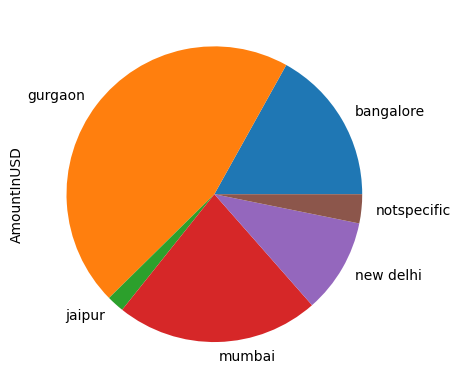

In [ ]:
df2[df2['InvestorsName'].str.contains('Tiger Global Management', na = False)].groupby('CityLocation')['AmountInUSD'].sum().plot(kind= 'pie')

In [ ]:
# Adding year & month column
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month

In [ ]:
#df2[df2['InvestorsName'].str.contains('Tiger Global Management', na = False)].groupby('Year')['AmountInUSD'].sum().plot()

In [ ]:
# maximum amount invested in start-up
round(df2['AmountInUSD'].max())
df2[df2['AmountInUSD'] == 1155000]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month
SNo,,,,,,,,,,
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,bangalore,SoftBank Group,Private Equity,1155000.0,2017.0,5.0
294,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1155000.0,2017.0,3.0


In [ ]:
# no of unique start-ups
df2['StartupName'].nunique()

2001

In [ ]:
df2.groupby(['Year','Month'])['StartupName'].count().reset_index()

,Year,Month,StartupName
0,2015.0,1.0,69
1,2015.0,2.0,54
2,2015.0,3.0,85
3,2015.0,4.0,66
4,2015.0,5.0,67
5,2015.0,6.0,82
6,2015.0,7.0,94
7,2015.0,8.0,83
8,2015.0,9.0,98
9,2015.0,10.0,82


In [ ]:
temp_df = df2.groupby(['Year','Month'])['AmountInUSD'].sum().reset_index()

In [ ]:
temp_df['x_axis']= temp_df['Month'].astype('str')+ '-'+ temp_df['Year'].astype('str')

In [ ]:
temp_df[['AmountInUSD', 'x_axis']]

,AmountInUSD,x_axis
0,7.974788e+05,1.0-2015.0
1,2.513697e+05,2.0-2015.0
2,5.785642e+05,3.0-2015.0
3,4.519309e+05,4.0-2015.0
4,1.703914e+05,5.0-2015.0
5,4.786031e+05,6.0-2015.0
6,1.277968e+06,7.0-2015.0
7,6.378496e+05,8.0-2015.0
8,1.173196e+06,9.0-2015.0
9,2.928040e+05,10.0-2015.0


In [ ]:
df2.head(2)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month
SNo,,,,,,,,,,
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,bangalore,Kae Capital,Private Equity,1072.5,2017.0,1.0
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,Private Equity,0.0,2017.0,2.0


##Preprocessing number of investors for each startup

####As various startups have multiple number of investors arrange according to the number of investors for a particular startup(startup n

In [ ]:
def calculate_n_investors(x):
  if  re.search(',',x) and x!='empty':
        return len(x.split(','))
  elif x!='empty':
        return 1
  else:
        return -1

df2['numberofinvestors'] = df2['InvestorsName'].replace(np.NaN, 'empty').apply(calculate_n_investors)

In [ ]:
n_inv=df2['InvestorsName']
n_inv.fillna(value='None',inplace=True)
listed_n_inv=n_inv.apply(lambda x: x.lower().strip().split(','))

In [ ]:
df2['InvestorsName'].fillna(value = 'None', inplace = True)
listed_n_inv = df2['InvestorsName'].apply(lambda x:x.lower().strip().split(','))

investors = []
for i in listed_n_inv:
  for j in i:
    if (i!='None' or i!=''):
      investors.append(j.strip())

unique_investors = list(set(investors))

In [ ]:
#df2[df2['InvestorsName'] == '']
investors = list(investors[investors != ''])
unique_investors = list(unique_investors[unique_investors != ''])
#listed_n_inv[listed_n_inv == '']
#pd.options.display.max_rows = 100
#investors.head(90)

In [ ]:
investors = pd.Series(investors)
unique_investors= pd.Series(unique_investors)

In [ ]:
investors

0     t
1     r
2     i
3     t
4     o
5     n
6      
7     i
8     n
9     v
10    e
11    s
12    t
13    m
14    e
15    n
16    t
17     
18    a
19    d
20    v
21    i
22    s
23    o
24    r
25    s
dtype: object

In [ ]:
len(investors)
len(unique_investors)
for i in range(len(unique_investors)):
  for j in range(len(investors)):
    if re.search(unique_investors[i], investors[j]):
      investors[j] = unique_investors[i]

In [ ]:
len(investors)

26

##FILLING MISSING VALUES IN AmountInUSD

####Converting data into lower case to avoid duplicacy

In [ ]:
df2.iloc[:,[2,3,4,6]]

,IndustryVertical,SubVertical,CityLocation,InvestmentType
SNo,,,,
0,Technology,Predictive Care Platform,bangalore,Private Equity
1,Technology,Digital Marketing Agency,mumbai,Private Equity
2,Consumer Internet,Online platform for Higher Education Services,new delhi,Seed Funding
3,Consumer Internet,DIY Ecommerce platform,mumbai,Seed Funding
4,Consumer Internet,healthcare service aggregator,hyderabad,Seed Funding
...,...,...,...,...
2367,Other,NaN,notspecific,Private Equity
2368,Other,NaN,notspecific,Private Equity
2369,Other,NaN,notspecific,Private Equity


In [ ]:
df2['AmountInUSD'].isna().sum()

df2.iloc[:,[2,3,4,6]] = df2.iloc[:,[2,3,4,6]].applymap(lambda x: x.lower().replace(',','') if pd.notnull(x) is True else x )

##Analysis of data after cleaning

####here yellow bars represent the Missing data(NULL values)

In [ ]:
df2.apply(lambda x:sum(x.isnull()))

Date                   1
StartupName            0
IndustryVertical       0
SubVertical          936
CityLocation           0
InvestorsName          0
InvestmentType         1
AmountInUSD            0
Year                   1
Month                  1
numberofinvestors      0
dtype: int64

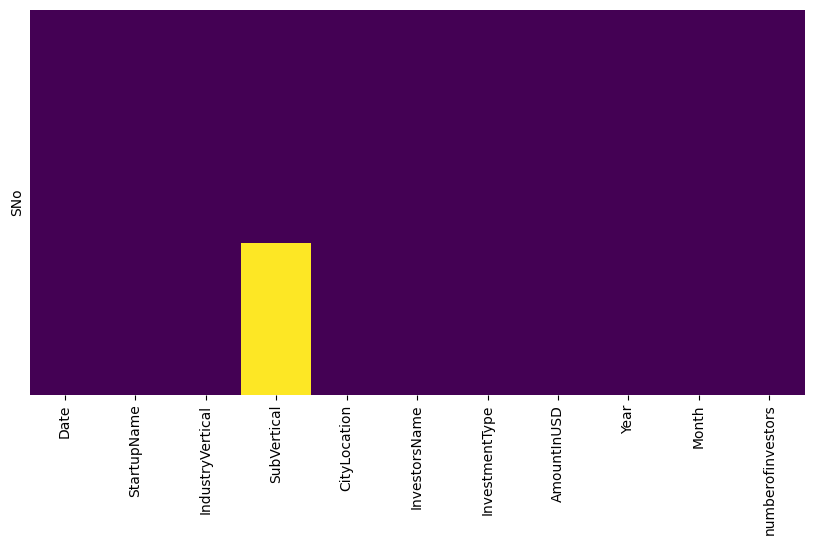

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.heatmap(df2.isnull(),cmap = 'viridis', yticklabels = False,cbar = False)
plt.show()

#### Removing ambigous records(startup names like flipkart and flipkart.com )

In [ ]:
unique_startup_name = list(df2['StartupName'].unique())
startup_name = list(df2['StartupName'])

for i in range(len(unique_startup_name)):
  for j in range(len(startup_name)):
    if(re.search(unique_startup_name[i], startup_name[j])):
      startup_name[j] = unique_startup_name[i]

In [ ]:
df2['StartupName'] = startup_name

In [ ]:
print(len(df2['StartupName']))
print(unique_startup_name)
print(startup_name)

2372
['TouchKin', 'Ethinos', 'Leverage Edu', 'Zepo', 'Click2Clinic', 'Billion Loans', 'Ecolibriumenergy', 'Droom', 'Jumbotail', 'Moglix', 'Timesaverz', 'Minjar', 'MyCity4kids', 'Clip App', 'Upwardly.in', 'Autorox.co', 'Fabogo', 'Flickstree', 'Design Cafe', 'Innoviti', 'VDeliver', 'Bottr.me', 'Arcatron', 'QwikSpec', 'Chumbak', 'Increff', 'Vayana', 'MObiquest', 'Ambee', 'Ideal Insurance', 'Hypernova Interactive', 'Rentomojo', 'AirCTO', 'Playablo', 'Trupay', 'Brick2Wall', 'FableStreet', 'Monsoon Fintech', 'MonkeyBox', 'Noticeboard', 'Byju’s', 'Creator’s Gurukul', 'Fab Hotels', 'ThinkerBell', '1mg', 'Jhakaas', 'BigStylist', 'Gympik.com', 'Tripeur', 'RentOnGo', 'Goomo', 'MaxMyWealth', 'Spinny', 'Healthbuds', 'Ftcash', 'BHIVE Workspace', 'wayForward', 'GyanDhan', 'Hungry Foal', 'ZipLoan', 'GrowFitter', 'Stratfit', 'Multiplier Solutions', 'ABI Health', 'Stockal', 'Guidoo', 'eSahai.in', 'Loanmeet', 'LendingKart', 'Boxx.ai', 'PeeSafe.in', 'Vista Rooms', 'CoverFox', 'HyperTrack', 'Goodera', 'Dig

## Indepth Analytics

In [ ]:
df2.describe()['AmountInUSD'].astype('int')

count       2372
mean        6381
std        42618
min            0
25%            0
50%          247
75%         2062
max      1155000
Name: AmountInUSD, dtype: int64

####How many unique startups are introduced in year between 2015-2017?

In [ ]:
df2.head(2)
print(df2['Year'].min())
print(df2['Year'].max())

2015.0
2017.0


In [ ]:
print(df2['StartupName'].nunique())

1928


##Top 10 startups had most funding
####paytm and flipkart were on the top of the run

In [ ]:
tp10fund  =df2.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False).astype('int')
print(tp10fund.head(10))

StartupName
Paytm         1930500
Flipkart      1864252
Ola           1567087
Snapdeal       577500
Oyo            504900
Quikr          189750
Delhivery      177375
Foodpanda      173250
BigBasket      170775
MakeMyTrip     148500
Name: AmountInUSD, dtype: int64


##DETAILS OF TOP 10 STARTUPS AS PER THE FUND GENERATED

####Below is the details about the top 10 startups on different Dates

In [ ]:
def top_10_fund(x):
  if x in tp10fund.head(10).index:
    return True
  return False

n =df2[df2['StartupName'].apply(top_10_fund)]
n.describe().astype('int')

,AmountInUSD,Year,Month,numberofinvestors
count,39,39,39,39
mean,187279,2015,5,1
std,270238,0,3,1
min,0,2015,1,1
25%,41250,2015,3,1
50%,82500,2016,5,1
75%,195937,2017,7,3
max,1155000,2017,12,6


## Which kind of investment did the top10 startups got

#### The top 10 investments were pivate equtiy and hence seed funding is nill
###### AS THE TOP 10 FUNDNDING AMOUNT ARE RECEIVED THROUGH PRIVATE EQUITY SO SORTING THE TOP 10 STARTUPS AS PER PRIVATE EQUITY BELOW THE PRIVATE EQUITY COLUMN REPRESENTS THE COUNT OF INVESTMENT TYPE

In [ ]:
pd.crosstab(index  =n['StartupName'], columns = n['InvestmentType']).sort_values(by = 'private equity' , ascending = False)

InvestmentType,private equity
StartupName,
Ola,9
Paytm,6
Flipkart,5
Oyo,5
BigBasket,3
Delhivery,3
Quikr,3
Foodpanda,2
Snapdeal,2


In [ ]:
n.InvestmentType.unique()

array(['private equity'], dtype=object)

## Insights regarding the best startup in terms of funding amount

In [ ]:
df2[df2['StartupName']== 'Paytm']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month,numberofinvestors
SNo,,,,,,,,,,,
158,2017-05-18,Paytm,ecommerce,mobile wallet & ecommerce platform,bangalore,SoftBank Group,private equity,1155000.0,2017.0,5.0,1
266,2017-03-03,Paytm,ecommerce,ecommerce marketplace,bangalore,Alibaba,private equity,165000.0,2017.0,3.0,1
821,2016-08-30,Paytm,ecommerce,mobile wallet & ecommerce platform,bangalore,MediaTek Inc.,private equity,49500.0,2016.0,8.0,1
1787,2015-09-29,Paytm,e-commerce & m-commerce platform,NaN,new delhi,"Alibaba Group, Ant Financial",private equity,561000.0,2015.0,9.0,2
2218,2015-03-13,Paytm,other,NaN,notspecific,Ratan Tata,private equity,0.0,2015.0,3.0,1
2276,2015-05-02,Paytm,other,NaN,notspecific,Ant Financial Services (Alipay),private equity,0.0,2015.0,5.0,1


## Companies with most number of investors

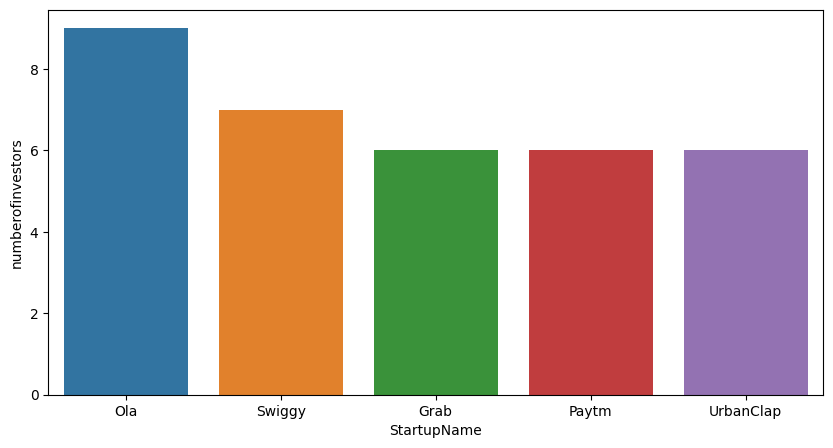

In [ ]:
cmi = df2.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending = False)
#print(cmi)
fig = plt.figure(figsize= (10,5))
sns.barplot(x ='StartupName', y = 'numberofinvestors', data = cmi.reset_index().head())
plt.show()

## Here we can see that kernel density of startups having two and three number of investors is high

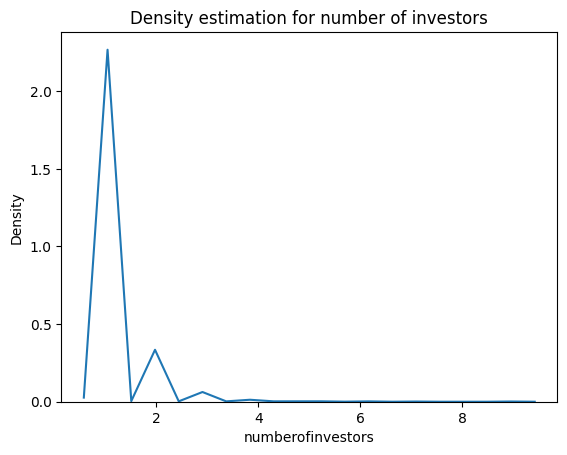

In [ ]:
cmi.reset_index()['numberofinvestors']
sns.kdeplot(data = cmi.reset_index()['numberofinvestors'], gridsize= 20)
plt.title('Density estimation for number of investors')
plt.show()

## Is funding depends upon number of investors

####here we can see that there is 50% relation between funding amount and number of investors

StartupName
Paytm         1930500
Flipkart      1864252
Ola           1567087
Snapdeal       577500
Oyo            504900
Quikr          189750
Delhivery      177375
Foodpanda      173250
BigBasket      170775
MakeMyTrip     148500
Name: AmountInUSD, dtype: int64
StartupName
Ola          9
Swiggy       7
Grab         6
Paytm        6
UrbanClap    6
Medinfi      5
Wooplr       5
Oyo          5
NoBroker     5
Jugnoo       5
Name: numberofinvestors, dtype: int64


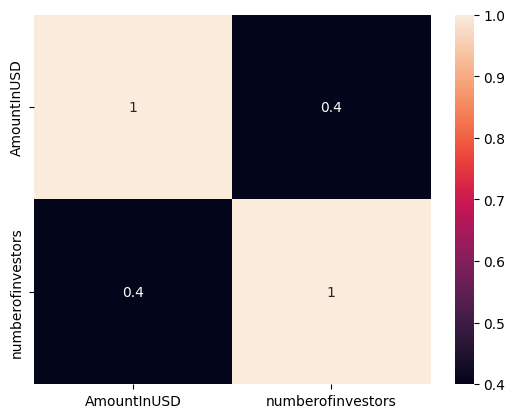

In [ ]:
print(tp10fund.head(10))
print(cmi.head(10))
top10 = (tp10fund.to_frame()).join(cmi.to_frame())
sns.heatmap(top10.corr(), annot = True)
plt.show()

## Investors
#### what are the total number of unique investors

In [ ]:
df2.head(2)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month,numberofinvestors
SNo,,,,,,,,,,,
0,2017-01-08,TouchKin,technology,predictive care platform,bangalore,Kae Capital,private equity,1072.5,2017.0,1.0,1
1,2017-02-08,Ethinos,technology,digital marketing agency,mumbai,Triton Investment Advisors,private equity,0.0,2017.0,2.0,1


## what are the total number of unique investors

In [ ]:
df2.InvestorsName.nunique()

1886

## Investors with most funding frequency

In [ ]:
investors

0     t
1     r
2     i
3     t
4     o
5     n
6      
7     i
8     n
9     v
10    e
11    s
12    t
13    m
14    e
15    n
16    t
17     
18    a
19    d
20    v
21    i
22    s
23    o
24    r
25    s
dtype: object

In [ ]:
df2.InvestorsName.value_counts()
df2[['InvestorsName','numberofinvestors']]

investors_1 = []
ck =  df2['InvestorsName'].apply(lambda x:x.lower().strip().split(','))
#print(ck)
#l1 = [elem.strip().split(';') for elem in l]

for elem in ck:
  for n in elem:
    investors_1.extend(n.strip().split(';'))

In [ ]:
print(investors_1)

['kae capital', 'triton investment advisors', 'kashyap deorah', 'anand sankeshwar', 'deepak jain', 'sadashiva nt', 'arjun mehta', 'satish kaul', 'anindya ghose', 'kunal shah', 'letsventure', 'anupam mittal', 'hetal sonpal', 'narottam thudi', 'shireesh palle', 'reliance corporate advisory services ltd', 'infuse ventures', 'jll', 'asset management (asia) ltd', 'digital garage inc', 'kalaari capital', 'nexus india capital advisors', 'international finance corporation', 'rocketship', 'accel partners', 'jungle ventures', 'shailesh rao', 'venture highway', 'bccl', 'blume ventures', 'contrarian capital india partners', 'emergent ventures india', 'pallav nadhani', 'ashish gupta', 'sharad sharma', 'sirion labs', 'none', 'india quotient', 'shunwei capital', 'sreeram iyer', 'suvo sarkar', 'anita gupta', 'likemind ventures', 'mitsui & co.', 'dunamis ventures pte ltd', 'venture catalysts', 'sourav ganguly', 'ankit aditya', 'moksh sports ventures', 'fireside ventures', 'apurva salarpuria', 'sidharth

## Investors with most funding frequency

In [ ]:
investor_series = pd.Series(investors_1)
investor_series = investor_series[(investor_series != 'undisclosed investors')& (investor_series !='')]
is20 = investor_series.value_counts().head(20)
is20

sequoia capital             64
accel partners              53
kalaari capital             44
saif partners               43
indian angel network        41
blume ventures              40
ratan tata                  30
nexus venture partners      25
rajan anandan               25
tiger global                25
idg ventures                23
kae capital                 23
undisclosed investor        22
india quotient              21
500 startups                20
group of angel investors    20
matrix partners             18
anupam mittal               18
mumbai angels               17
letsventure                 17
dtype: int64

Top investors by funding


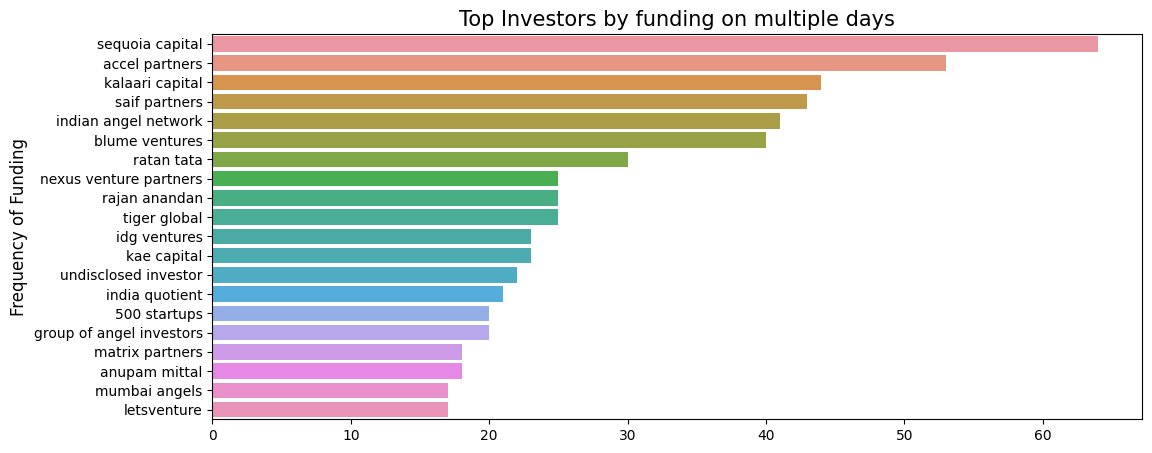

In [ ]:
print("Top investors by funding")
plt.figure(figsize= (12,5))
bar = sns.barplot(y = is20.index[:20], x = is20.values[:20])
#bar.set_xticklabels(bar.get_xticklabels, rotation = 70)
bar.set_title("Top Investors by funding on multiple days", fontsize = 15)
bar.set_xlabel("", fontsize=12)
bar.set_ylabel("Frequency of Funding", fontsize=12)
plt.show()

['kae capital' 'triton investment advisors' 'kashyap deorah'
 'anand sankeshwar' 'deepak jain' 'sadashiva nt' 'arjun mehta'
 'satish kaul' 'anindya ghose' 'kunal shah' 'letsventure' 'anupam mittal'
 'hetal sonpal' 'narottam thudi' 'shireesh palle'
 'reliance corporate advisory services ltd' 'infuse ventures' 'jll'
 'asset management (asia) ltd' 'digital garage inc']


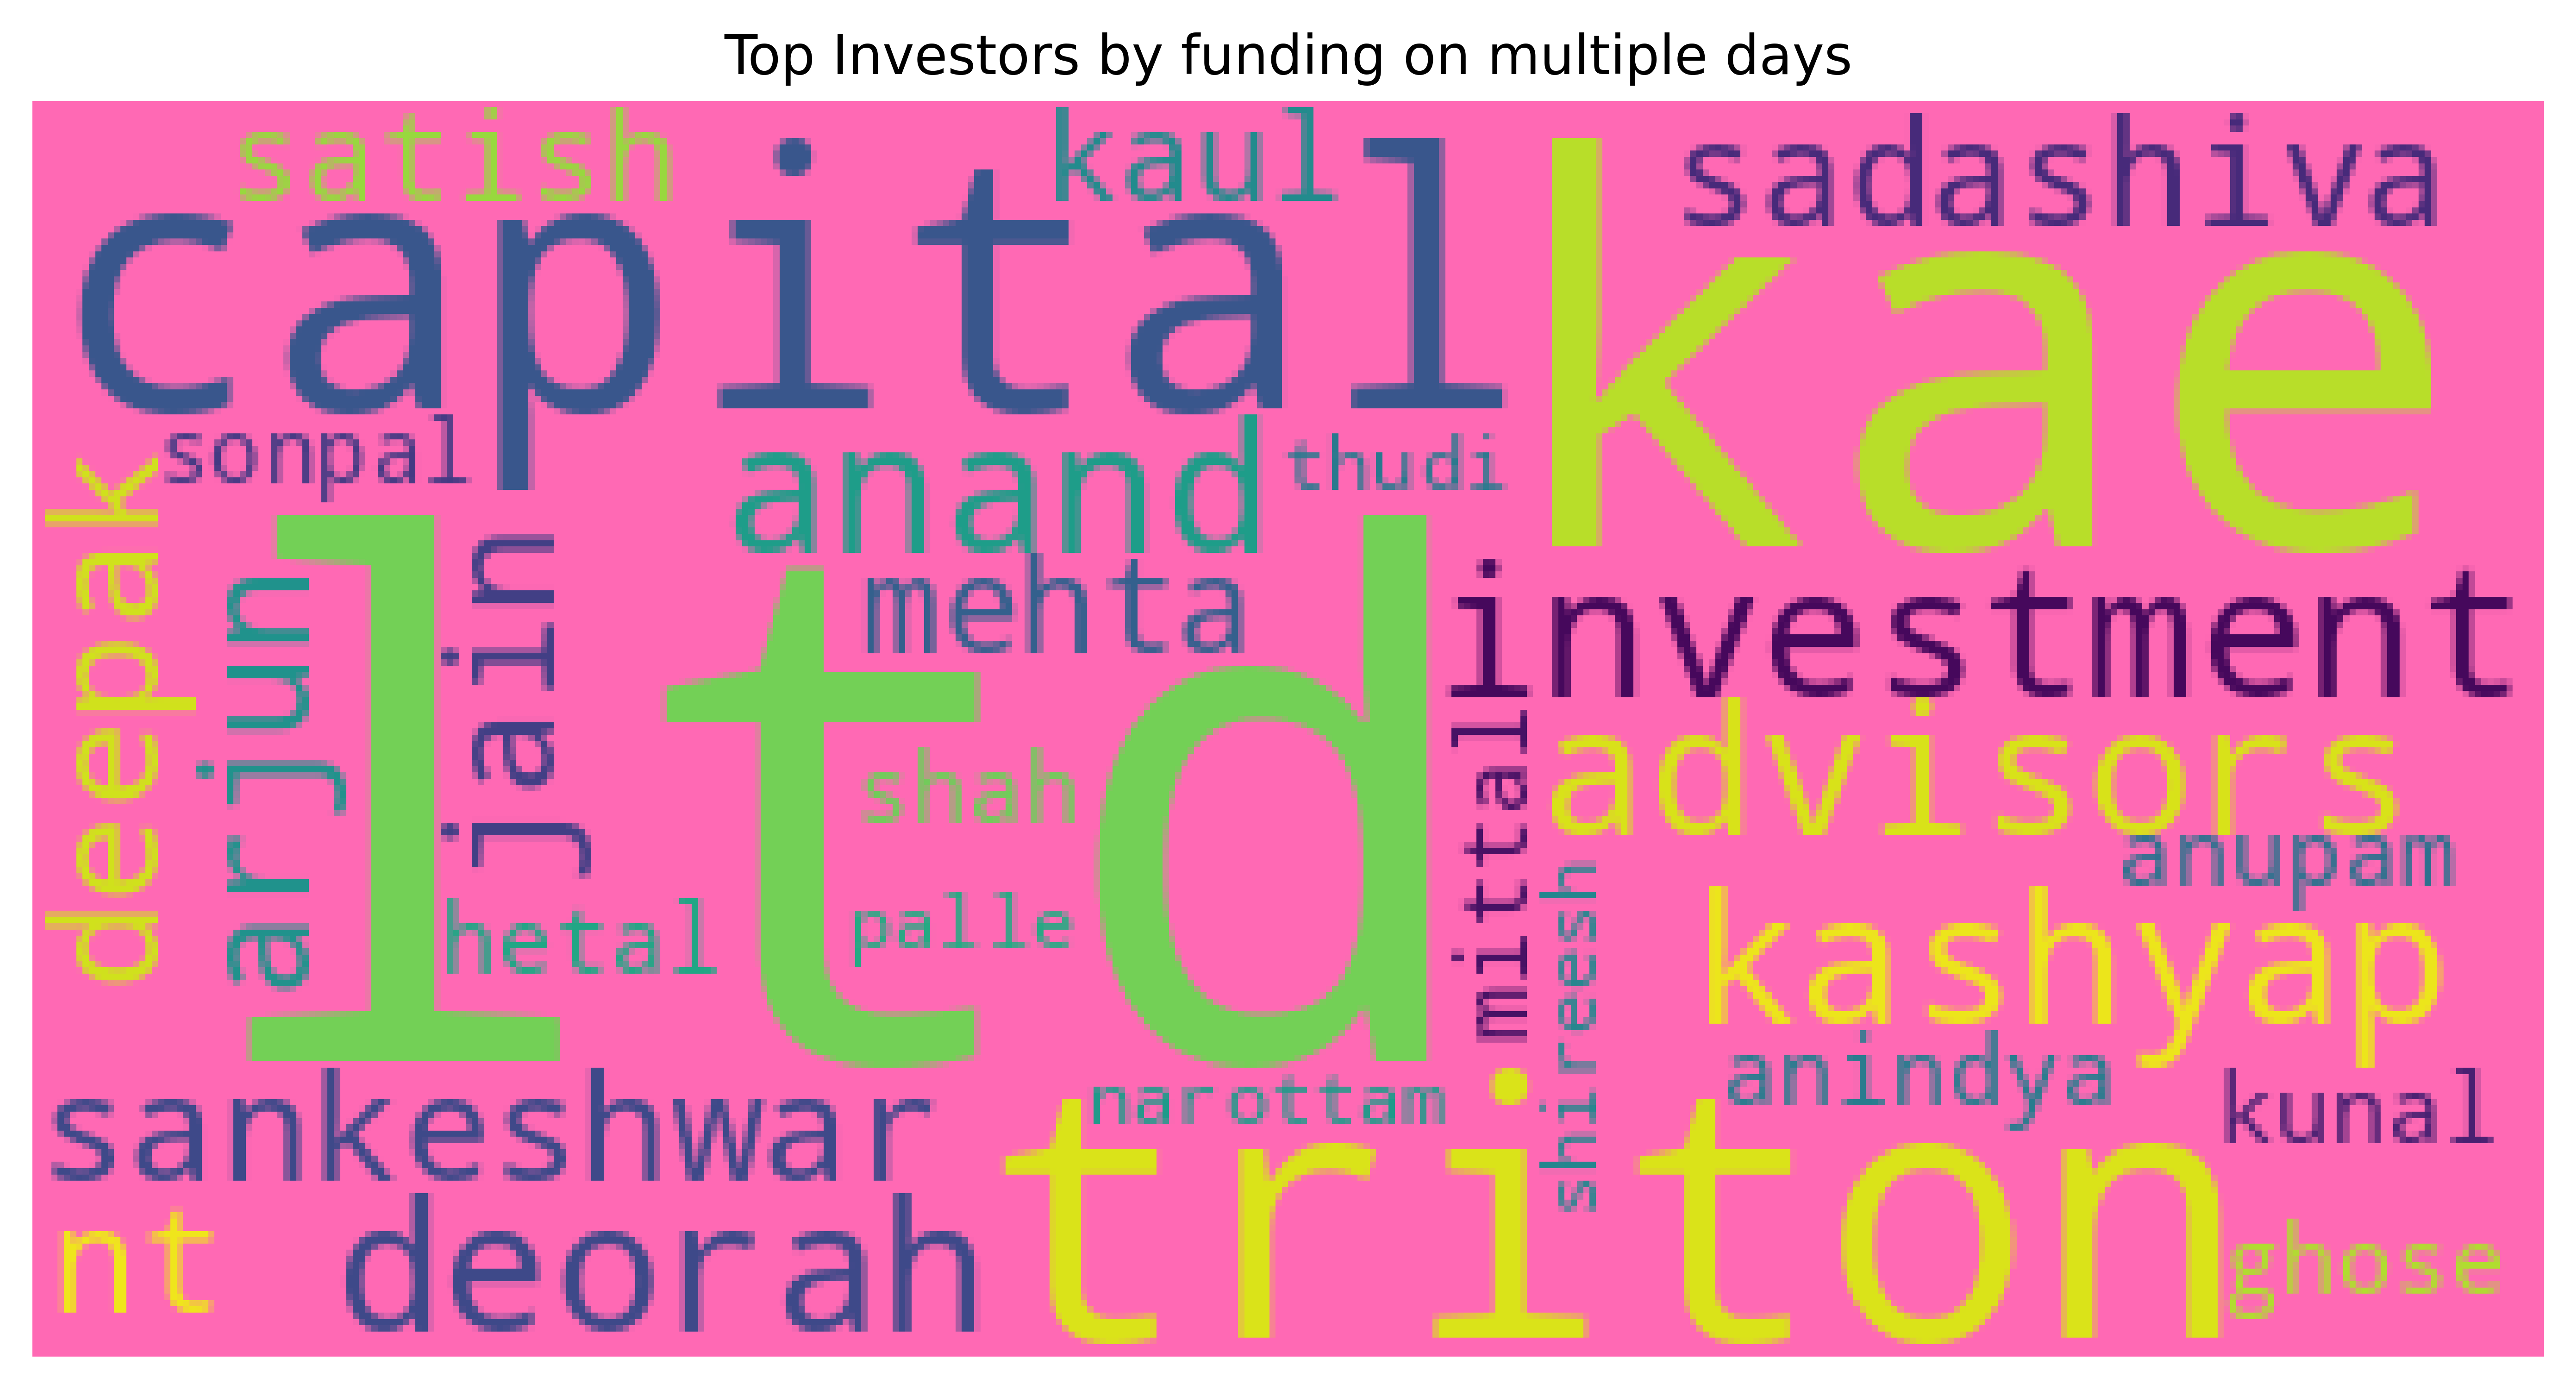

In [ ]:
from wordcloud import WordCloud, STOPWORDS
investor = investor_series.head(10).values
arr = np.array(investor)

#for inves_nm in range(len(arr)):
  #arr[inves_nm] = arr[inves_nm].strip()
  #arr[inves_nm] = arr[inves_nm].replace(' ','_')
  #arr[inves_nm] = arr[inves_nm].replace("'",'')
  #arr[inves_nm] = arr[inves_nm].replace("",'')

#print(arr)

Ind = investor_series.head(20).apply(lambda x:x.strip().lower())
print(Ind.values)
fig = plt.figure(figsize = (10,10), dpi = 700)
wc = WordCloud(max_words = 30, stopwords = set(Ind), background_color = 'hotpink', random_state = 1).generate(str(Ind[:30]))
plt.axis('off')
plt.title('Top Investors by funding on multiple days')
plt.imshow(wc)
plt.show()

##Top 10 Investors with highest funding amount

In [ ]:
d  = dict()
print(investors_1)
print(listed_n_inv)

for i in investors_1:
  for j in range(len(listed_n_inv)):
    if i in listed_n_inv[j]:
      d[i] = df2['AmountInUSD'][j]/len(listed_n_inv[j])

['kae capital', 'triton investment advisors', 'kashyap deorah', 'anand sankeshwar', 'deepak jain', 'sadashiva nt', 'arjun mehta', 'satish kaul', 'anindya ghose', 'kunal shah', 'letsventure', 'anupam mittal', 'hetal sonpal', 'narottam thudi', 'shireesh palle', 'reliance corporate advisory services ltd', 'infuse ventures', 'jll', 'asset management (asia) ltd', 'digital garage inc', 'kalaari capital', 'nexus india capital advisors', 'international finance corporation', 'rocketship', 'accel partners', 'jungle ventures', 'shailesh rao', 'venture highway', 'bccl', 'blume ventures', 'contrarian capital india partners', 'emergent ventures india', 'pallav nadhani', 'ashish gupta', 'sharad sharma', 'sirion labs', 'none', 'india quotient', 'shunwei capital', 'sreeram iyer', 'suvo sarkar', 'anita gupta', 'likemind ventures', 'mitsui & co.', 'dunamis ventures pte ltd', 'venture catalysts', 'sourav ganguly', 'ankit aditya', 'moksh sports ventures', 'fireside ventures', 'apurva salarpuria', 'sidharth

In [ ]:
d

{'kae capital': 137.5,
 'triton investment advisors': 0.0,
 'kashyap deorah': 0.0,
 'anand sankeshwar': 397.2375,
 'kunal shah': 0.0,
 'letsventure': 148.5,
 'anupam mittal': 33.589285714285715,
 'narottam thudi': 350.625,
 'reliance corporate advisory services ltd': 825.0,
 'infuse ventures': 0.0,
 'jll': 206.25,
 'asset management (asia) ltd': 8250.0,
 'kalaari capital': 1031.25,
 'international finance corporation': 8250.0,
 'rocketship': 412.5,
 'accel partners': 825.0,
 'jungle ventures': 275.0,
 'venture highway': 0.0,
 'bccl': 825.0,
 'blume ventures': 330.0,
 'ashish gupta': 0.0,
 'sharad sharma': 0.0,
 'none': 825.0,
 'india quotient': 213.675,
 'shunwei capital': 2475.0,
 'sreeram iyer': 0.0,
 'mitsui & co.': 10725.0,
 'dunamis ventures pte ltd': 1856.25,
 'venture catalysts': 123.75,
 'fireside ventures': 0.0,
 'sbi-fmo fund': 5087.5,
 'bessemer venture partners': 3300.0,
 'catamaran ventures': 2000.625,
 'corvus ventures': 0.0,
 'mape advisory group': 0.0,
 '500 startups': 

In [ ]:
Investor_amount = pd.Series(d, name = 'Amount')
Investor_amount = Investor_amount.reset_index().groupby('index').sum()['Amount'].sort_values(ascending = False).head(100).reset_index()
Investor_amount.columns=['Investor','Amount']

Top 10 Most Funded Investors


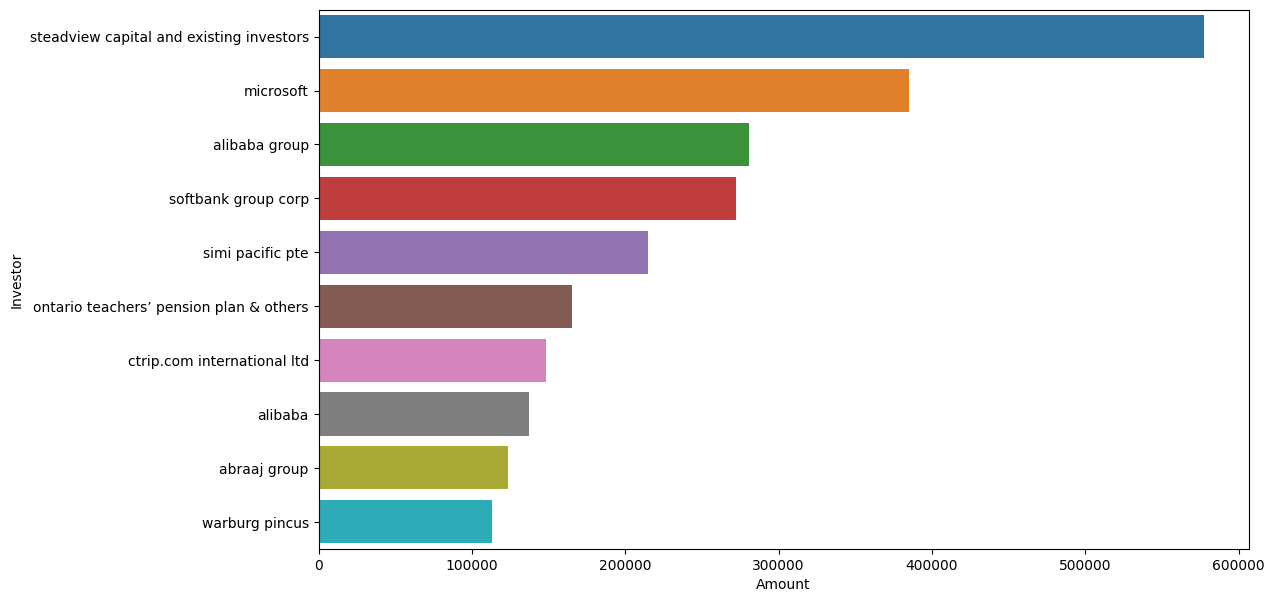

In [ ]:
print('Top 10 Most Funded Investors')
plt.figure(figsize = (12,7))
sns.barplot(y='Investor', x = 'Amount' , data = Investor_amount.head(10))
plt.show()

## Which industry vertical opted by top investors?

In [ ]:
#for i in investors_1:
  #for j in range(len(listed_n_inv)):
    #if i in listed_n_inv[j]:
     # d[i] = df2['AmountInUSD'][j]/len(listed_n_inv[j])


top_industry_vertical= {}
for i in Investor_amount['Investor'].head(20):
  for j in range(len(listed_n_inv)):
    if i in listed_n_inv[j]:
      top_industry_vertical[i] = df2['IndustryVertical'][j]

In [ ]:
top_industry_vertical

{'steadview capital and existing investors': 'online marketplace',
 'microsoft': 'ecommerce',
 'alibaba group': 'e-commerce & m-commerce platform',
 'softbank group corp': 'consumer internet',
 'simi pacific pte': 'consumer internet',
 'ontario teachers’ pension plan & others': 'ecommerce',
 'ctrip.com international ltd': 'consumer internet',
 'alibaba': 'ecommerce marketplace',
 'abraaj group': 'ecommerce',
 'warburg pincus': 'logistics solution provider',
 'rocket internet ag & others': 'other',
 'dst global': 'cab aggregator',
 'tiger global & other investors': 'other',
 'tennenbaum capital partners & others': 'mobile advertising platform',
 'baillie gifford': 'car aggregator & retail mobile app',
 'clairvest group': 'consumer internet',
 'naspers': 'ecommerce',
 'chryscapital': 'business and it consulting',
 'softbank vision fund': 'consumer internet',
 'mediatek inc.': 'ecommerce'}

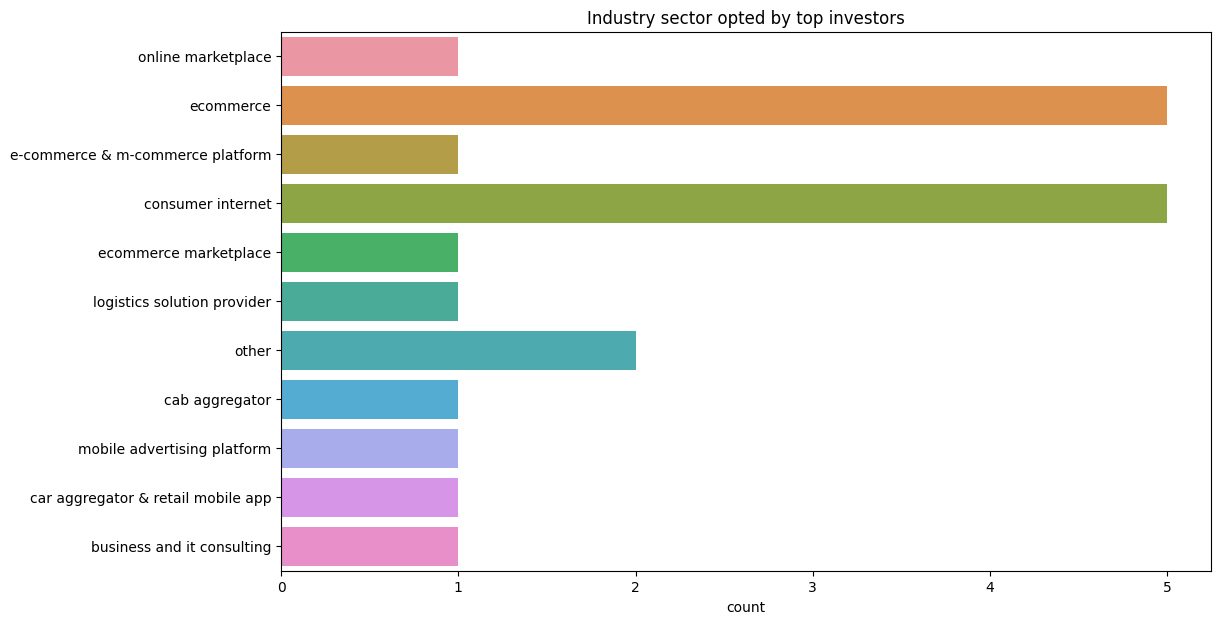

In [ ]:
plt.figure(figsize= (12,7))
sns.countplot(y = pd.Series(top_industry_vertical))
plt.title('Industry sector opted by top investors')
plt.show()

## Pairing of amount and number of investors :

#### here we can see that most funding is generated through privateequity ( in terms of amount )
#### most of the startups have seed funding (in terms of funding frequency )

#### Total amount of funding recieved as per investment type

In [ ]:
df2.groupby('InvestmentType').sum()['AmountInUSD'].astype('int')

<ipython-input-95-f13292261484>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



InvestmentType
crowd funding          128
debt funding          6435
private equity    14855020
privateequity          825
seed funding        265928
seedfunding           8256
Name: AmountInUSD, dtype: int64

#### Total number of funding recieved as per investment type

In [ ]:
df2['InvestmentType'].value_counts()

seed funding      1271
private equity    1066
seedfunding         30
crowd funding        2
debt funding         1
privateequity        1
Name: InvestmentType, dtype: int64

## WordCloud of best startups and sectors by amount of funding

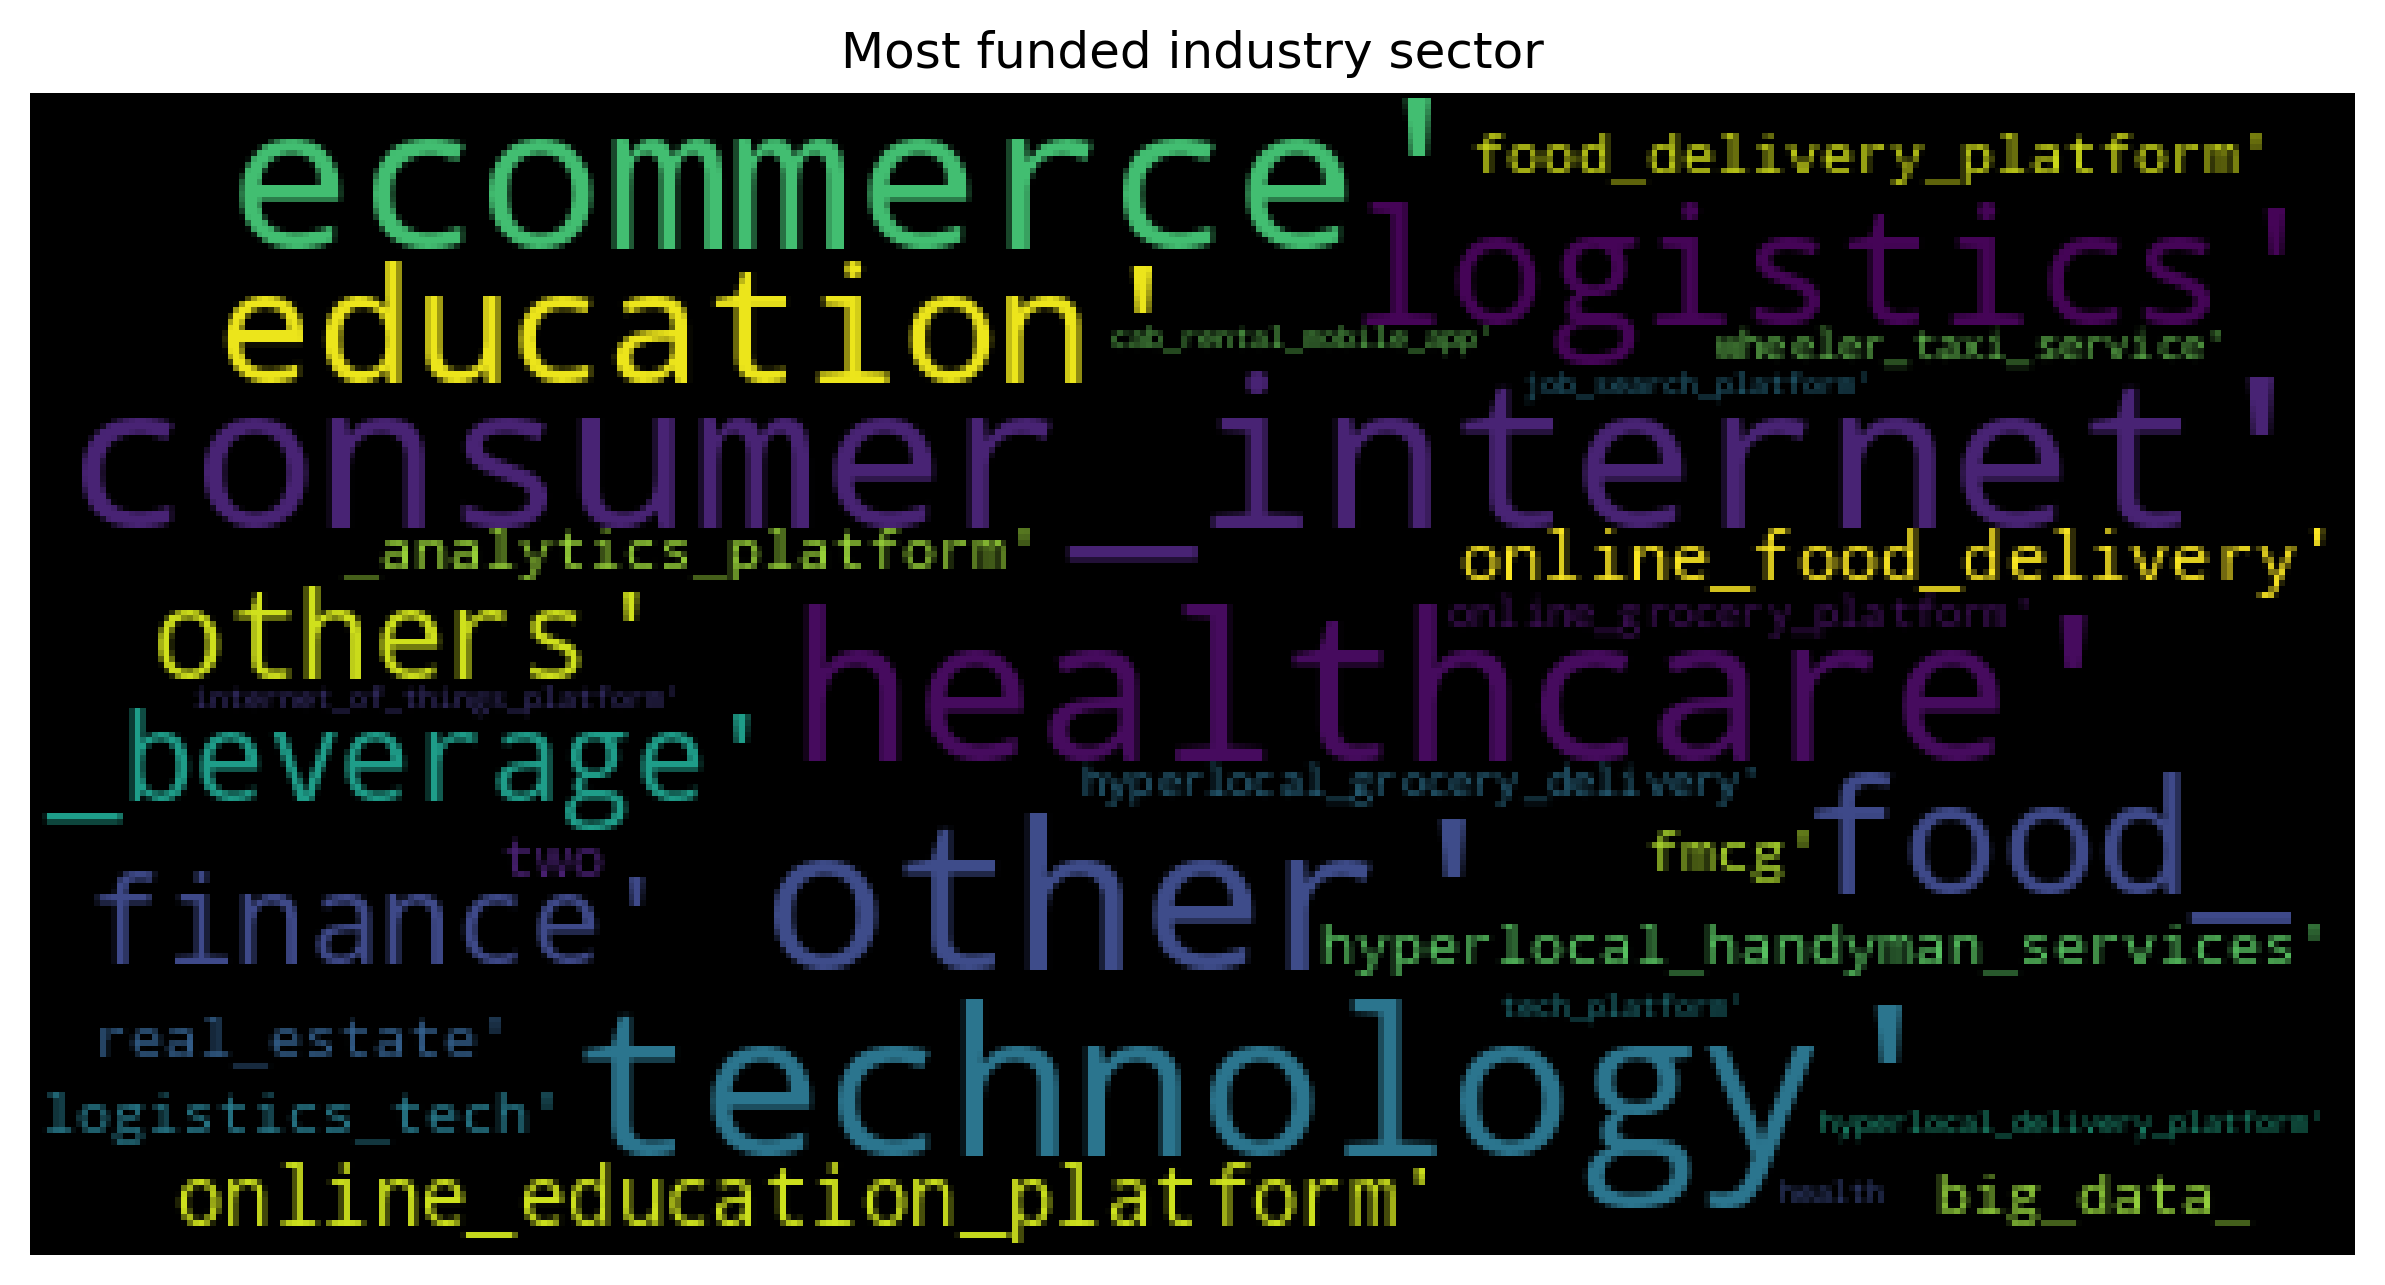

In [ ]:
from wordcloud import WordCloud,STOPWORDS
c = np.array(df2['IndustryVertical'].value_counts().head(30).index.unique())
fig , ax = plt.subplots(nrows = 1, ncols = 1, figsize= (10,10), dpi = 300)
for char in range(len(c)):
  c[char]= c[char].replace(' ','_')

wc = WordCloud(max_words = 30 ,stopwords= set(c),random_state = 1).generate(str(c))
ax.axis('off')
ax.set_title('Most funded industry sector')
ax.imshow(wc)

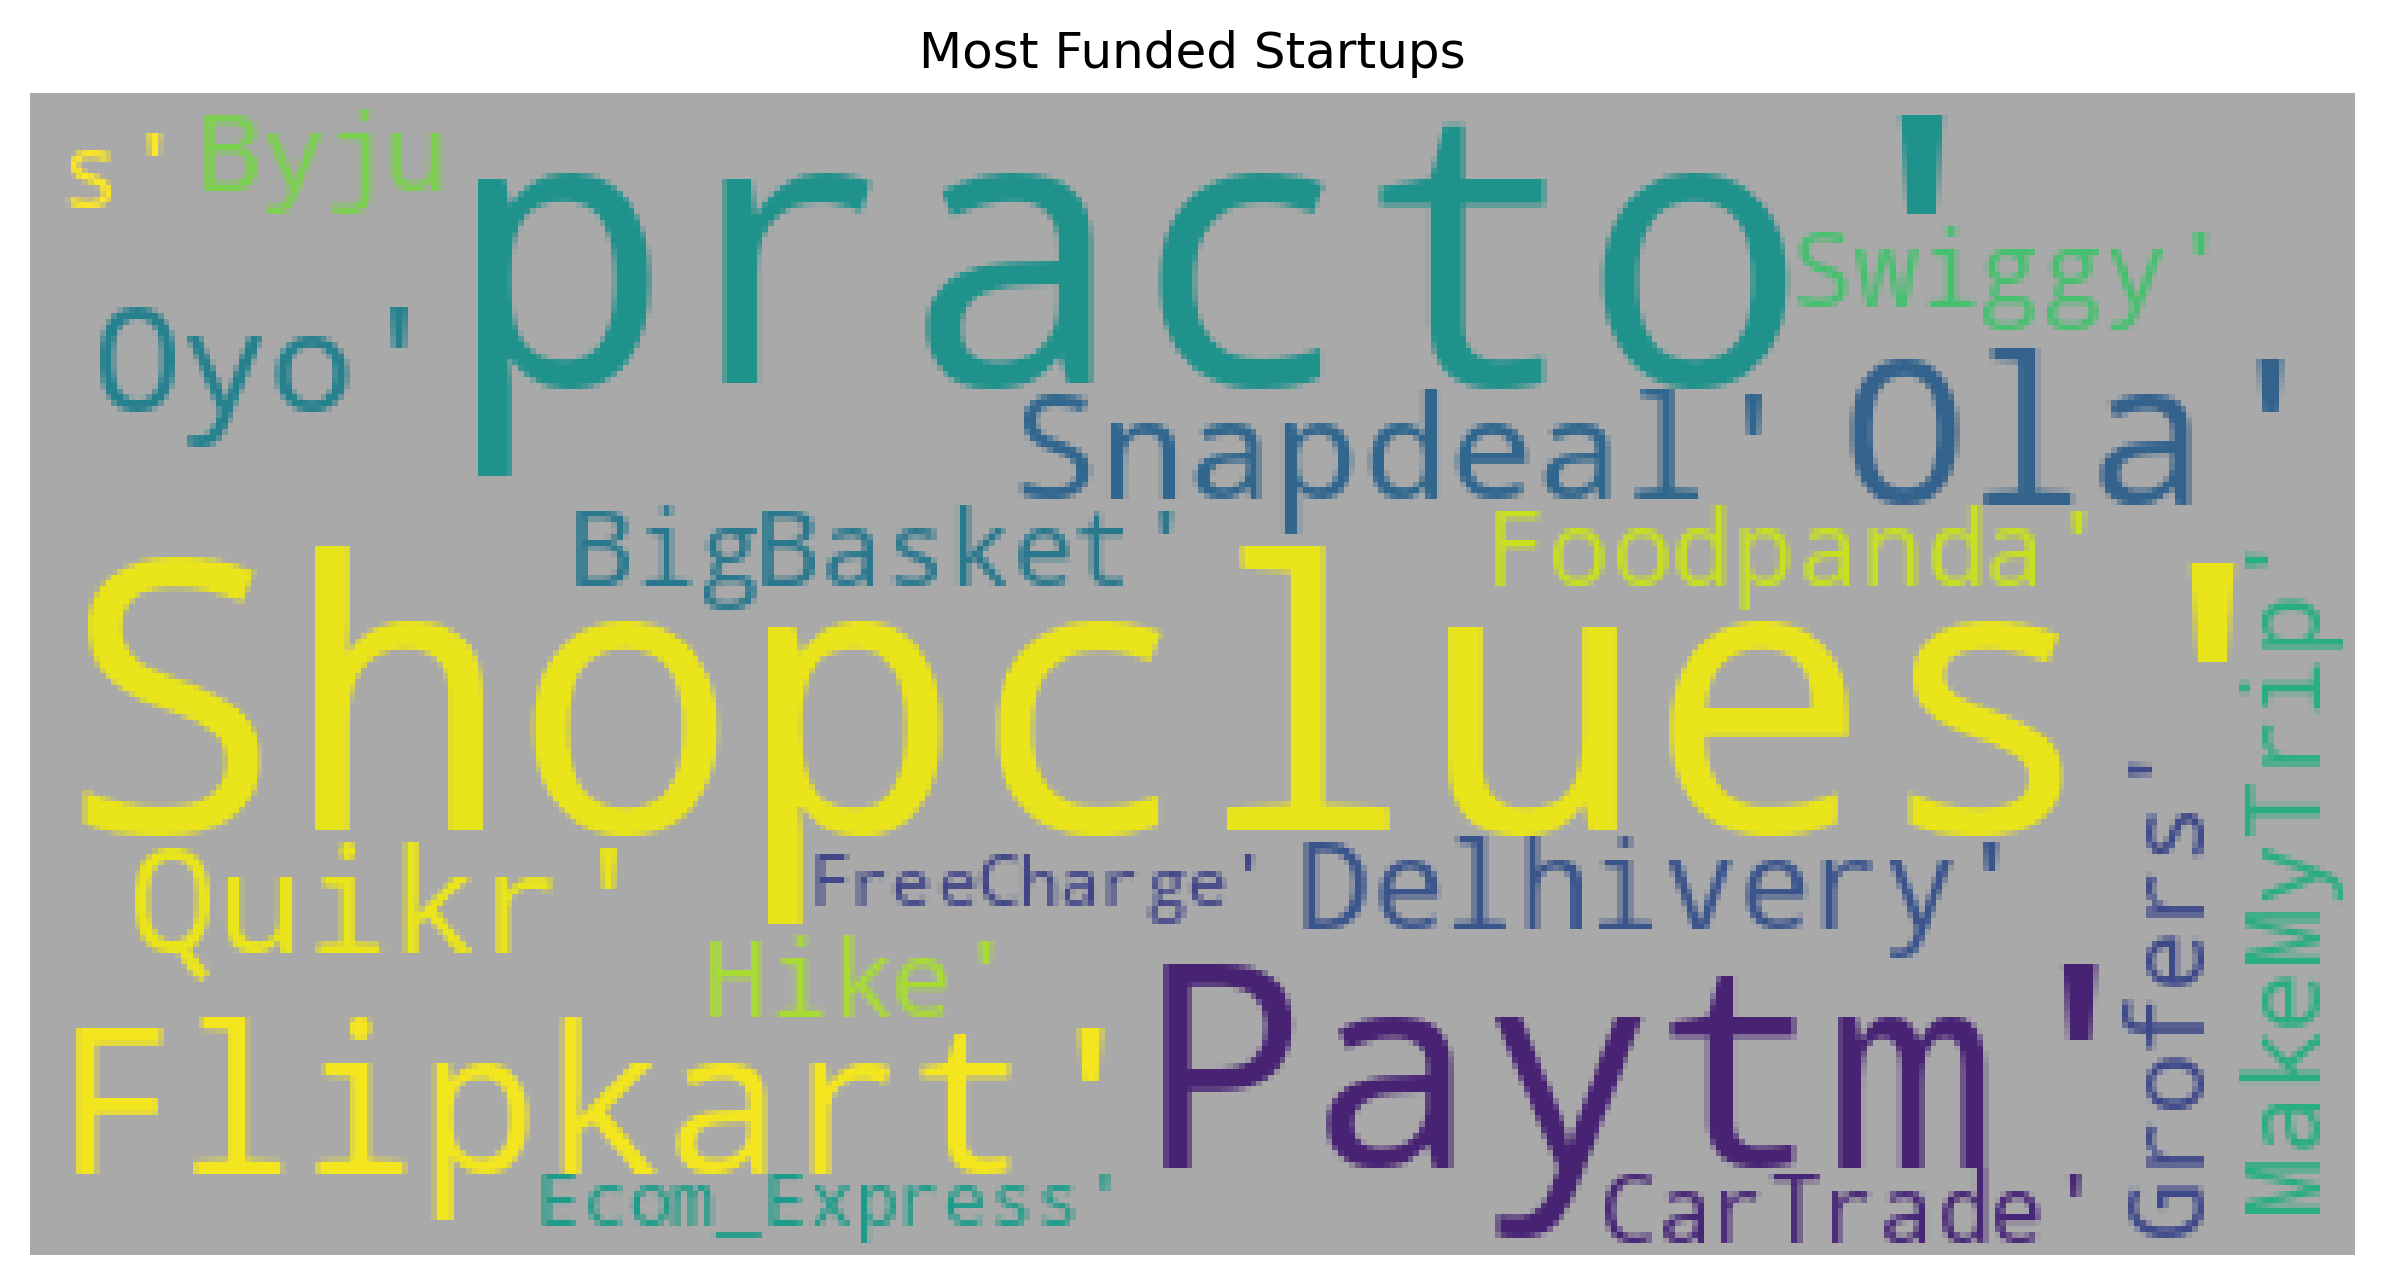

In [ ]:
from wordcloud import WordCloud,STOPWORDS

st = pd.Series(df2.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False).head(40).index).head(30)
#print(st)
fig , ax = plt.subplots(nrows = 1, ncols = 1, figsize= (10,10), dpi = 300)
for char in range(len(st)):
  st[char] = st[char].replace(' ','_')

wc = WordCloud(max_words = 20 , stopwords = set(st), background_color = 'darkgrey',random_state = 0 ).generate(str(st.values[:30]))
ax.axis('off')
ax.set_title('Most Funded Startups')
ax.imshow(wc)

In [ ]:
for x in df2['AmountInUSD']:
  if re.search(',',str(x)):
    print(x)

## Top 10 industry sectors with most funding

##### visualization of the growth rate of each sector (industry vertical)¶
Here we can see that consumer internet sector has more funding (as per amount)
Here we can see that consumer internet sector has most frequency
It also seen that debt funding and crowd funding are negligible as compared to other Investment types

In [ ]:
df2['IndustryVertical']= df2['IndustryVertical'].apply(lambda x:x.lower())

<ipython-input-101-726c38314239>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



consumer internet    772
technology           313
ecommerce            230
other                171
healthcare            31
Name: IndustryVertical, dtype: int64
InvestmentType
crowd funding          128
debt funding          6435
private equity    14855020
privateequity          825
seed funding        265928
seedfunding           8256
Name: AmountInUSD, dtype: int64
<class 'list'>
[Index(['consumer internet', 'technology', 'ecommerce', 'other', 'healthcare'], dtype='object'), Index(['crowd funding', 'debt funding', 'private equity', 'privateequity',
       'seed funding', 'seedfunding'],
      dtype='object', name='InvestmentType')]


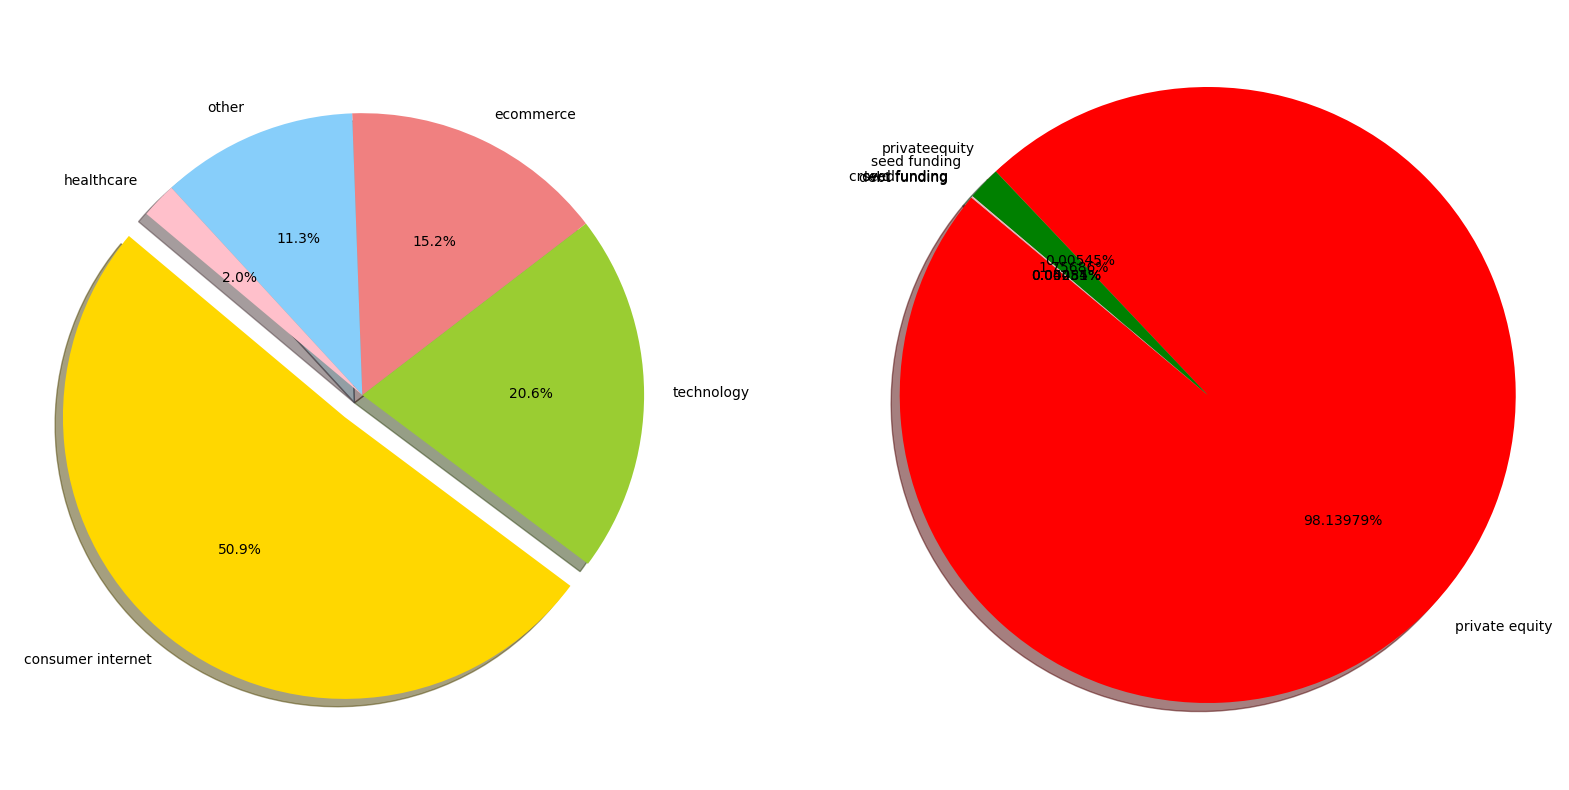

In [ ]:
# in which sector there are most startups
d =df2['IndustryVertical'].value_counts().head(5)
f = df2.groupby('InvestmentType').sum()['AmountInUSD'].astype('int')
print(d)
print(f)
fig,ax  =plt.subplots(nrows = 1, ncols = 2,figsize = (20,10))
labels= [d.index, f.index ]
size  =[d.values, f.values]
print(type(labels))
print(labels)
colors = [['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink'],['green','pink','red','yellow']]
plt.axis('equal')
explode = ((0.1, 0, 0, 0,0),(-0.5,0.5,0.1,0.1))
ax[0].pie(size[0],explode = explode[0] ,labels = labels[0],colors = colors[0],autopct='%1.1f%%',shadow = True,startangle = 140)
#ax[1].pie(size[1],explode = explode[1], labels = labels[1],colors = colors[1], autopct = '%1.5f%%', shadow = True , startangle = 140 )
ax[1].pie(size[1], labels=labels[1], colors=colors[1],autopct='%1.5f%%', shadow=True, startangle=140)
plt.show()

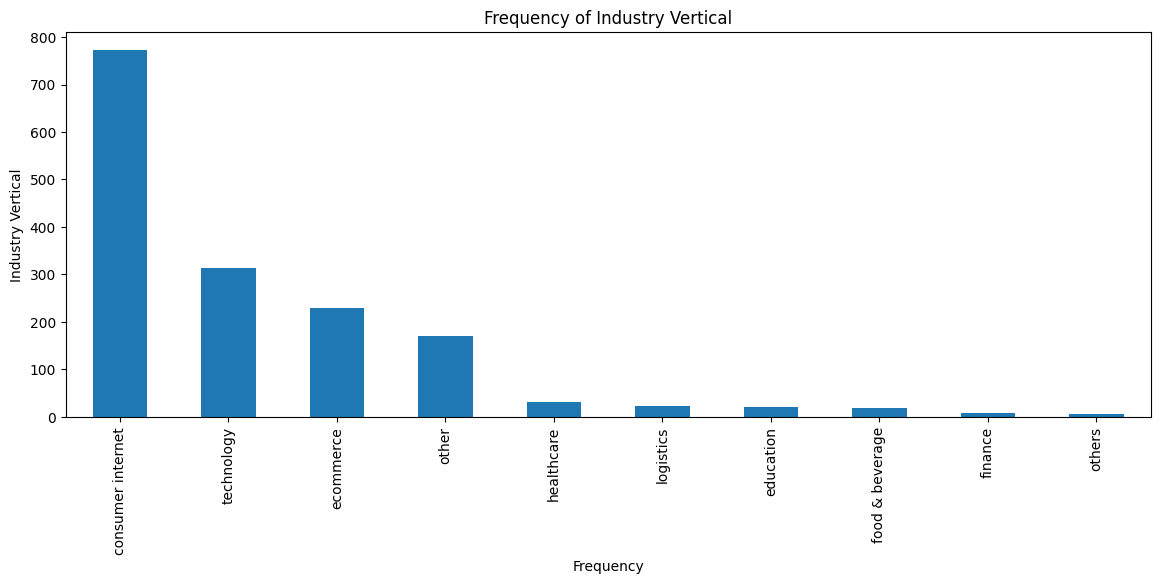

In [ ]:
# df2.head(2)
plt.figure(figsize= (14,5))
iv = df2['IndustryVertical'].value_counts().head(10)
iv.plot.bar()

plt.title('Frequency of Industry Vertical')
plt.ylabel('Industry Vertical')
plt.xlabel('Frequency')
plt.show()

## Most preferrable cities as per Investment on startups
#### Insights provided shows that Banglore has the most average funding Amount

<ipython-input-103-c77c3bdcb888>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Distribution of Startup cross Top Cities')

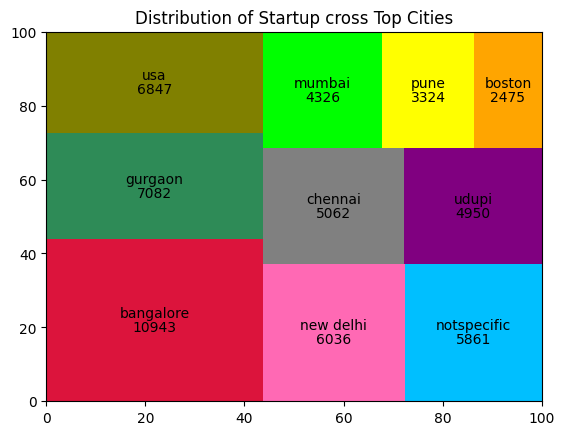

In [ ]:
mean_amount = df2.groupby('CityLocation').mean()['AmountInUSD'].astype('int').sort_values(ascending = False).iloc[1:].head(10)
squarify.plot(sizes = mean_amount.values, label = mean_amount.index, value = mean_amount.values, color=['crimson','seagreen','olive','hotpink','deepskyblue','grey','purple','lime','yellow','orange'])
plt.title('Distribution of Startup cross Top Cities')

In [ ]:
#sns.barplot(y = 'CityLocation', x= 'AmountInUSD', data = df2[(df2['InvestmentType']== 'debtfunding')|(df2['InvestmentType']  == 'crowdfunding')],
            #estimator = np.sum , palette = 'coolwarm')
#plt.show()

## Time Series Analysis

In [ ]:
dnewdf = df2.set_index('Date')
dnewdf.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month,numberofinvestors
Date,,,,,,,,,,
2017-01-08,TouchKin,technology,predictive care platform,bangalore,Kae Capital,private equity,1072.50,2017.0,1.0,1
2017-02-08,Ethinos,technology,digital marketing agency,mumbai,Triton Investment Advisors,private equity,0.00,2017.0,2.0,1
2017-02-08,Leverage Edu,consumer internet,online platform for higher education services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seed funding,0.00,2017.0,2.0,7
2017-02-08,Zepo,consumer internet,diy ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seed funding,412.50,2017.0,2.0,4
2017-02-08,Click2Clinic,consumer internet,healthcare service aggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seed funding,701.25,2017.0,2.0,2


In [ ]:
print('total number of unique startups founded in 2017: '+ str(len(dnewdf['2017']['StartupName'].unique())))
print('total number of unique startups founded in 2016: '+ str(len(dnewdf['2016']['StartupName'].unique())))
print('total number of unique startups founded in 2015: '+ str(len(dnewdf['2015']['StartupName'].unique())))

total number of unique startups founded in 2017: 419
total number of unique startups founded in 2016: 923
total number of unique startups founded in 2015: 829


<ipython-input-106-5116b612b804>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-106-5116b612b804>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-106-5116b612b804>:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



## Total funding in 2017

In [ ]:
dnewdf['2017']['AmountInUSD'].sum()

<ipython-input-107-60832eb47ba2>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



4823177.2875

## Total funding in 2016

In [ ]:
dnewdf['2016']['AmountInUSD'].sum()

<ipython-input-108-b44d07184fdc>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



3158173.1015999997

## Total funding in 2015

In [ ]:
dnewdf['2015']['AmountInUSD'].sum().astype('int')

<ipython-input-109-b302204d7ed8>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



7155078

In [ ]:
dnewdf.resample

<bound method DataFrame.resample of                  StartupName   IndustryVertical  \
Date                                              
2017-01-08          TouchKin         technology   
2017-02-08           Ethinos         technology   
2017-02-08      Leverage Edu  consumer internet   
2017-02-08              Zepo  consumer internet   
2017-02-08      Click2Clinic  consumer internet   
...                      ...                ...   
2015-01-29        Printvenue              other   
2015-01-29          Graphene              other   
2015-01-30    Mad Street Den              other   
2015-01-30         Simplotel              other   
2015-01-31  couponmachine.in              other   

                                              SubVertical CityLocation  \
Date                                                                     
2017-01-08                       predictive care platform    bangalore   
2017-02-08                       digital marketing agency       mumbai   
2017

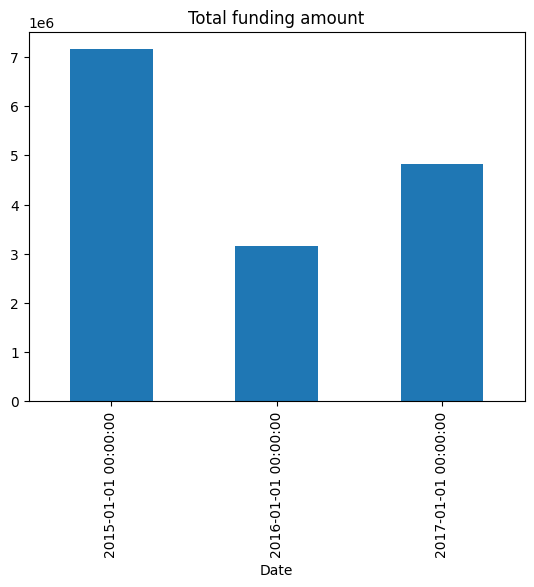

In [ ]:
plt.title('Total funding amount')
dnewdf.resample('AS')['AmountInUSD'].sum().plot.bar()
plt.show()

## Plotting Average Year-Start-wise graph for investment in period between January-2015 to Jan-2017 (Annual Starting)

Text(0.5, 1.0, 'Average funding amount')

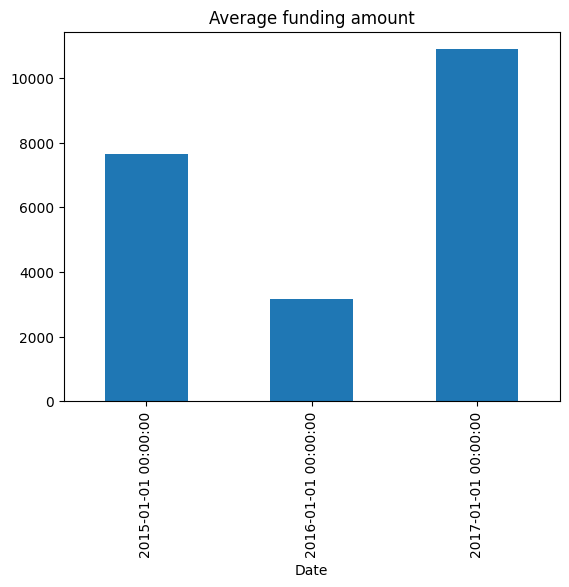

In [ ]:
q = dnewdf['AmountInUSD'].resample('AS').mean()
q.plot(kind = 'bar')
plt.title('Average funding amount')

In [ ]:
dnewdf[(dnewdf['Year'] == 2015)]['AmountInUSD'].sum().astype('int')

7155078

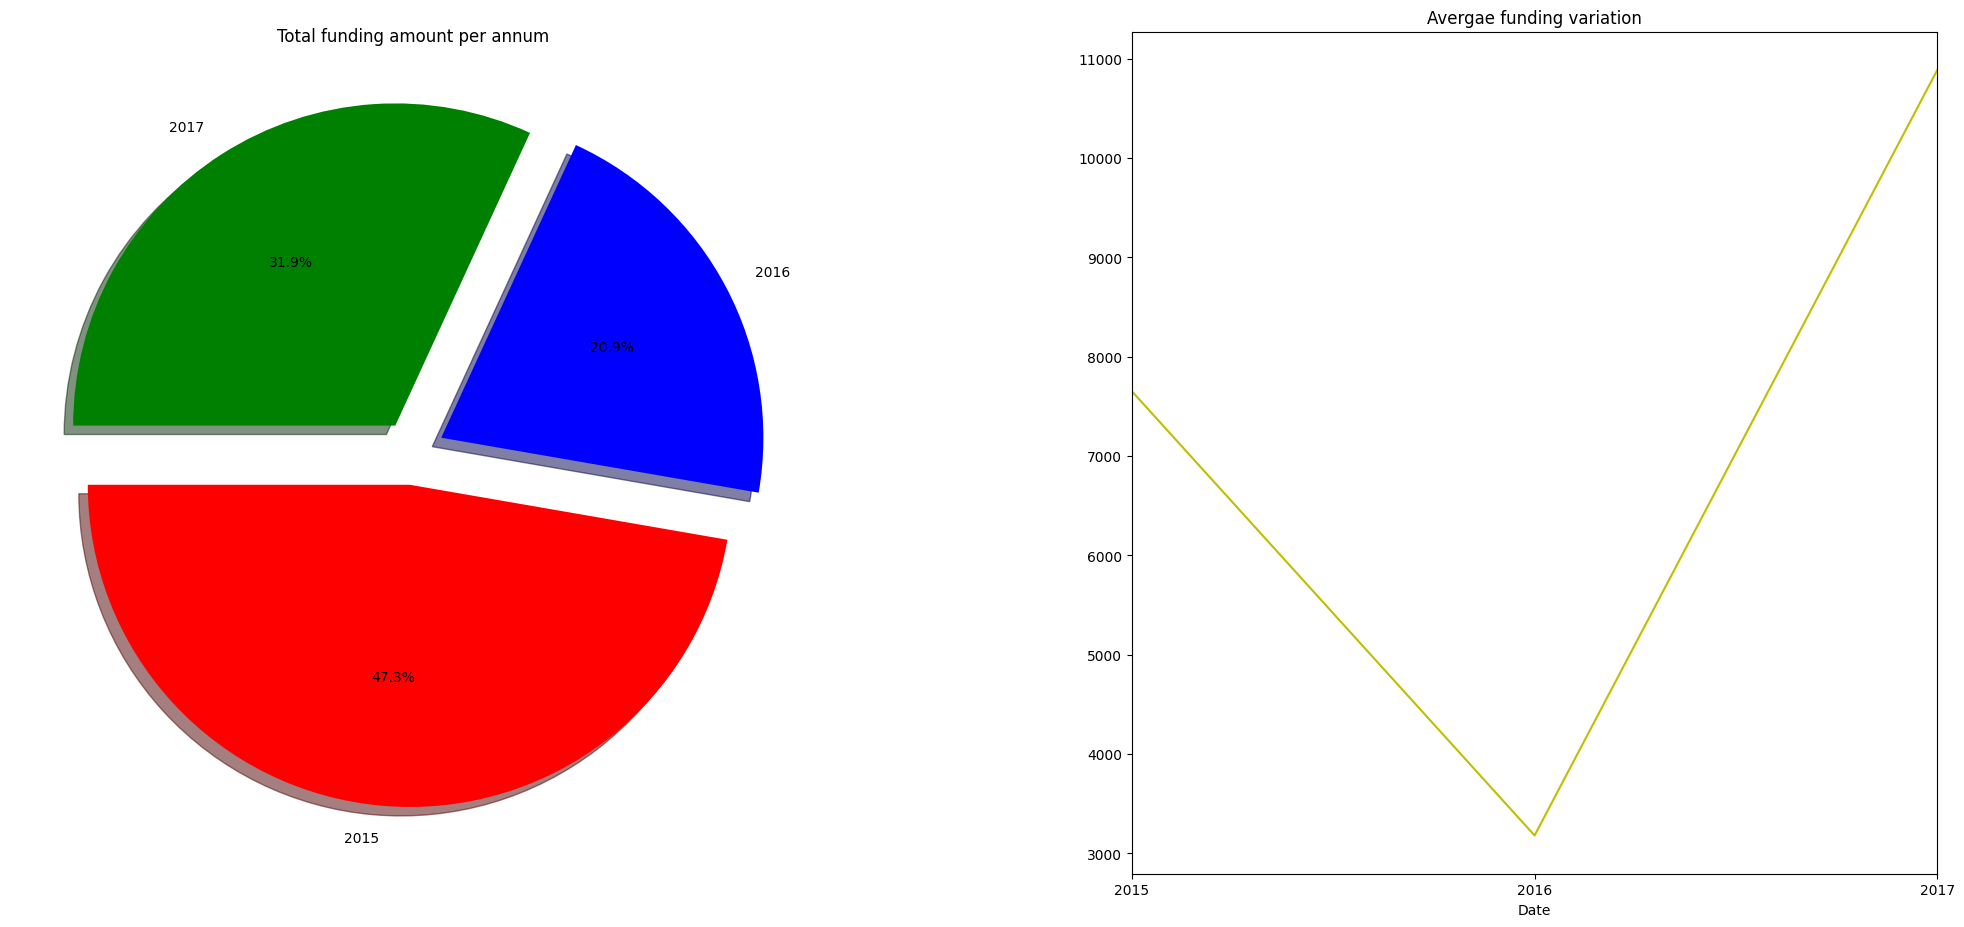

In [ ]:
a = dnewdf['AmountInUSD'].resample('AS').sum().astype('int')
fig,ax = plt.subplots(nrows = 1 , ncols = 2)

fig.tight_layout(pad = 3)
fig.set_figheight(11)
fig.set_figwidth(24)

explode = (0.1,0.1,0.1)

ax[0].pie(a,autopct = '%1.1f%%',shadow = True, startangle = 180 , explode = explode , colors = ['red','blue','green'], labels = ['2015','2016','2017'])
ax[0].set_title('Total funding amount per annum')
q.plot(color = 'y', ax = ax[1])
ax[1].set_title('Avergae funding variation')
plt.show()

Text(0.5, 1.0, 'Total Funding Amount')

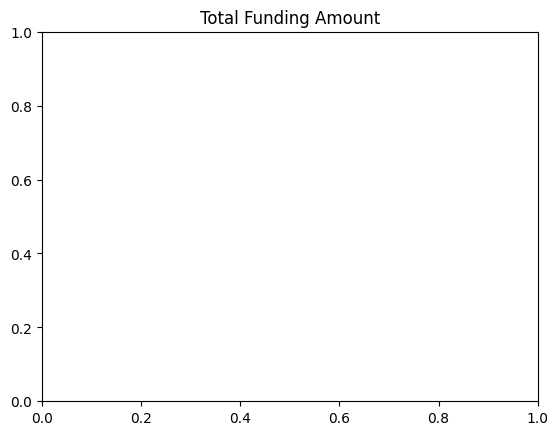

In [ ]:
plt.title('Total Funding Amount')

In [ ]:
df2.head(2)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month,numberofinvestors
SNo,,,,,,,,,,,
0,2017-01-08,TouchKin,technology,predictive care platform,bangalore,Kae Capital,private equity,1072.5,2017.0,1.0,1
1,2017-02-08,Ethinos,technology,digital marketing agency,mumbai,Triton Investment Advisors,private equity,0.0,2017.0,2.0,1


Text(0.5, 1.0, 'Funding Variation Per Month from 2015-2017')

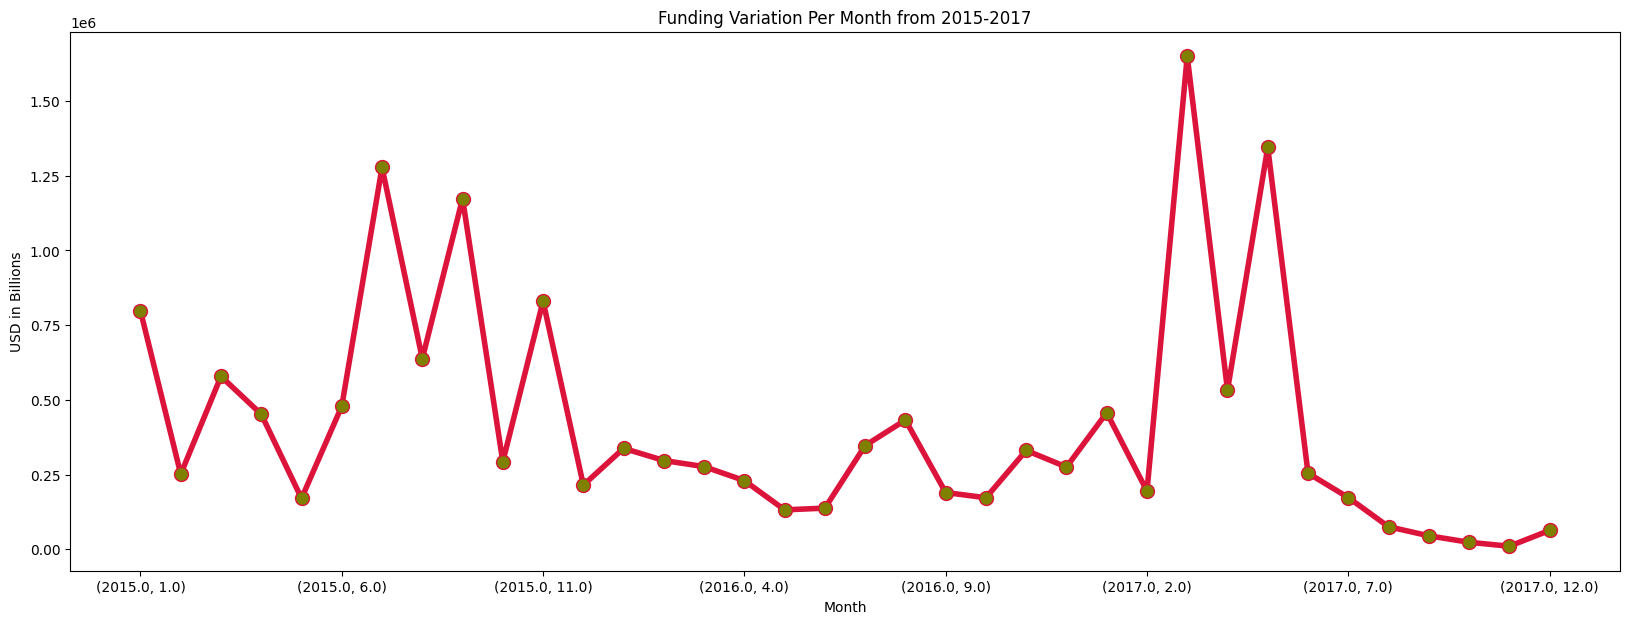

In [ ]:
fig = plt.figure(figsize = (20,7))
fig.set_figheight
ts_month = df2.groupby(['Year','Month']).agg({'AmountInUSD':'sum'})['AmountInUSD']
ts_month.plot(linewidth = 4, color = 'crimson',marker = 'o',markersize= 10 , markerfacecolor = 'olive')
plt.ylabel('USD in Billions')
plt.xlabel('Month')
plt.title('Funding Variation Per Month from 2015-2017')

## Insights of 2015
Below we can visualize that total funding reached to its peak between the months of june - july and Aug - Sep
End week of july was most attracted to investments
Quarter 3 was seen as the most funded quarter of 2015

In [ ]:
#dnewdf['2016'].resample('MS').sum()
dnewdf['2016'].resample('MS').sum()['AmountInUSD']

<ipython-input-133-7d2ae38c0cbf>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-133-7d2ae38c0cbf>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Date
2016-01-01    337731.0750
2016-02-01    296995.8750
2016-03-01    276467.0766
2016-04-01    229746.0000
2016-05-01    131828.4000
2016-06-01    137614.1250
2016-07-01    347160.0000
2016-08-01    432438.6000
2016-09-01    189855.6000
2016-10-01    172299.6000
2016-11-01    330792.8250
2016-12-01    275243.9250
Freq: MS, Name: AmountInUSD, dtype: float64

In [156]:
print(df2.Year.unique())
print(dnewdf.Year.unique())
dnewdf.head(1)

[2017. 2016. 2015.   nan]
[2017. 2016. 2015.   nan]


,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month,numberofinvestors
Date,,,,,,,,,,
2017-01-08,TouchKin,technology,predictive care platform,bangalore,Kae Capital,private equity,1072.5,2017.0,1.0,1


In [159]:
dnewdf['2016'].resample('Q').sum()

<ipython-input-159-727a02e5269d>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-159-727a02e5269d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,AmountInUSD,Year,Month,numberofinvestors
Date,,,,
2016-03-31,911194.0266,506016.0,472.0,505
2016-06-30,499188.5250,534240.0,1316.0,468
2016-09-30,969454.2000,481824.0,1912.0,459
2016-12-31,778336.3500,479808.0,2619.0,464


<ipython-input-161-bfdfdc13cbcd>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-161-bfdfdc13cbcd>:10: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-161-bfdfdc13cbcd>:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-161-bfdfdc13cbcd>:13: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in

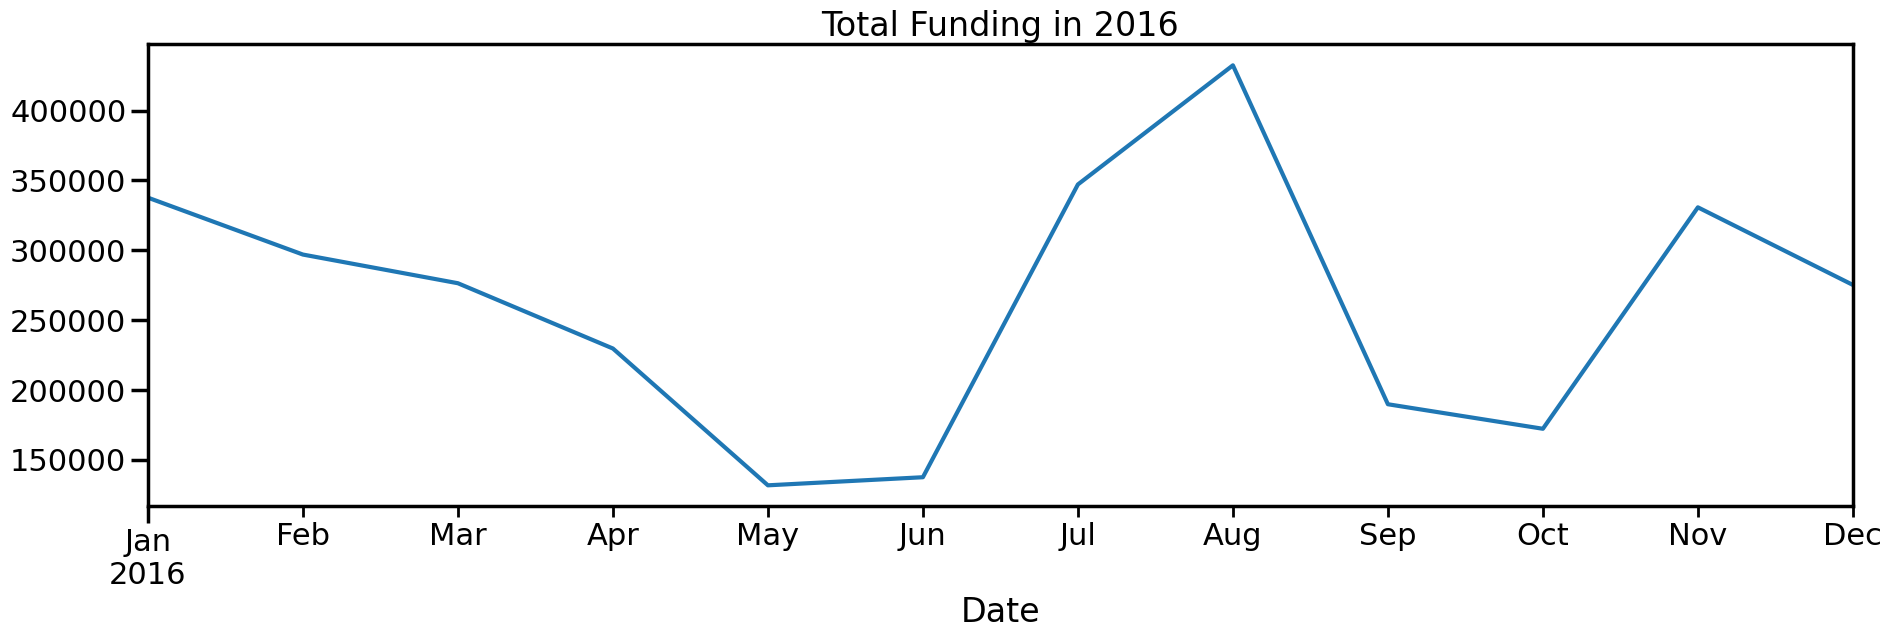

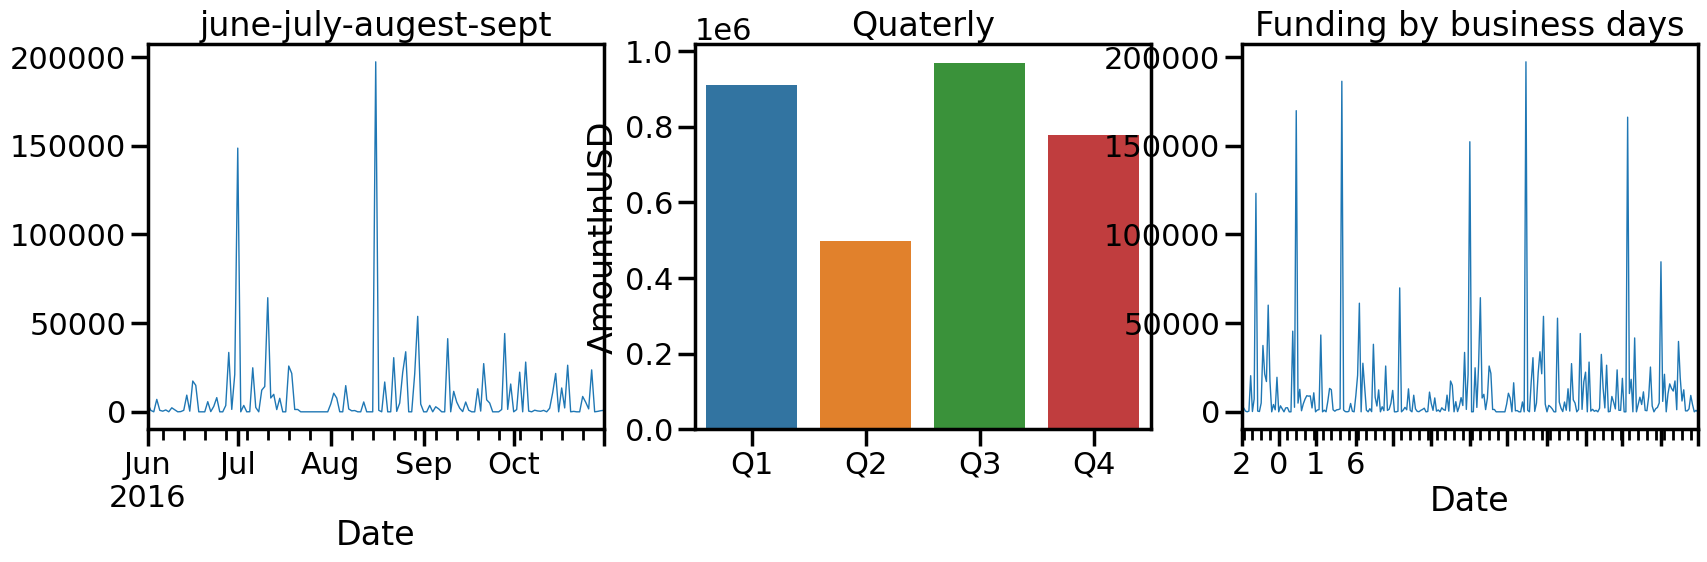

In [161]:
sns.set_context('poster',font_scale = 1)
plt.figure(figsize= (22,6))
a = dnewdf[(dnewdf['Year'] == 2016)].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('Total Funding in 2016')

fig2, axes = plt.subplots(nrows = 1, ncols = 3 , figsize = (20,5))
a1 = dnewdf['2016-06':'2016-10'].resample('d')['AmountInUSD'].sum().fillna(method = 'ffill').plot(ax = axes[0],lw = 1)
a1.set_title('june-july-augest-sept')

a2 = sns.barplot(data = dnewdf['2016'].resample('Q').sum().reset_index(), y = 'AmountInUSD', x= ['Q1','Q2','Q3','Q4'], ax = axes[1])
a2.set_title('Quaterly')

a3= dnewdf['2016'].resample('B')['AmountInUSD'].sum().plot(ax = axes[2], lw = 1)
a3.set_title('Funding by business days')

a3.set_xticklabels('2016')
plt.show()
#dnewdf['2016'].resample('Q').sum().reset_index()
#.resample('MS').sum()
#dnewdf[(dnewdf['Year'] == 2015)]['AmountInUSD'].sum().astype('int')
#dnewdf['2016'].resample('MS').sum()['AmountInUSD'].plot()

## Insights of 2017

Month of March and second Week of May had seen peak funding scenarios
Quarter 2 has most funding


<ipython-input-170-81299f6ceba4>:5: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-170-81299f6ceba4>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-170-81299f6ceba4>:15: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-170-81299f6ceba4>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select on

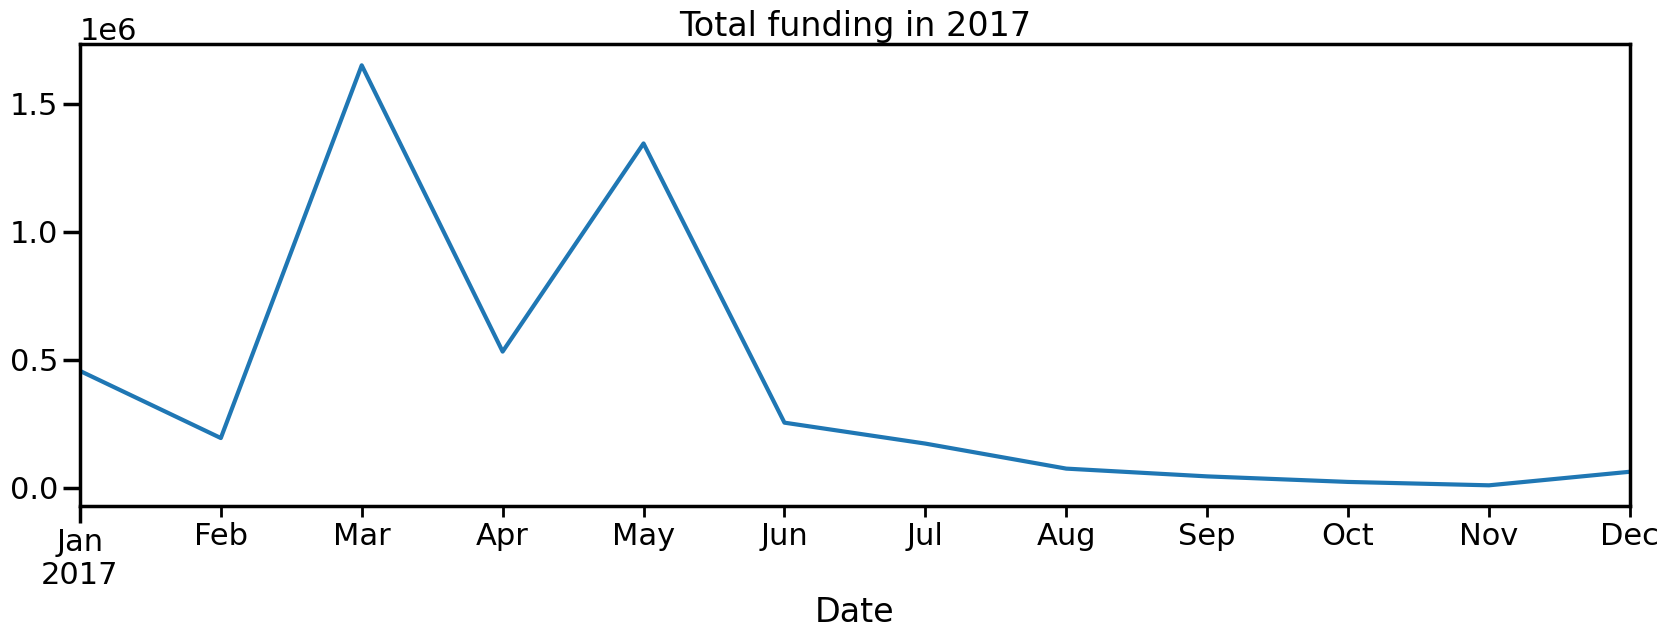

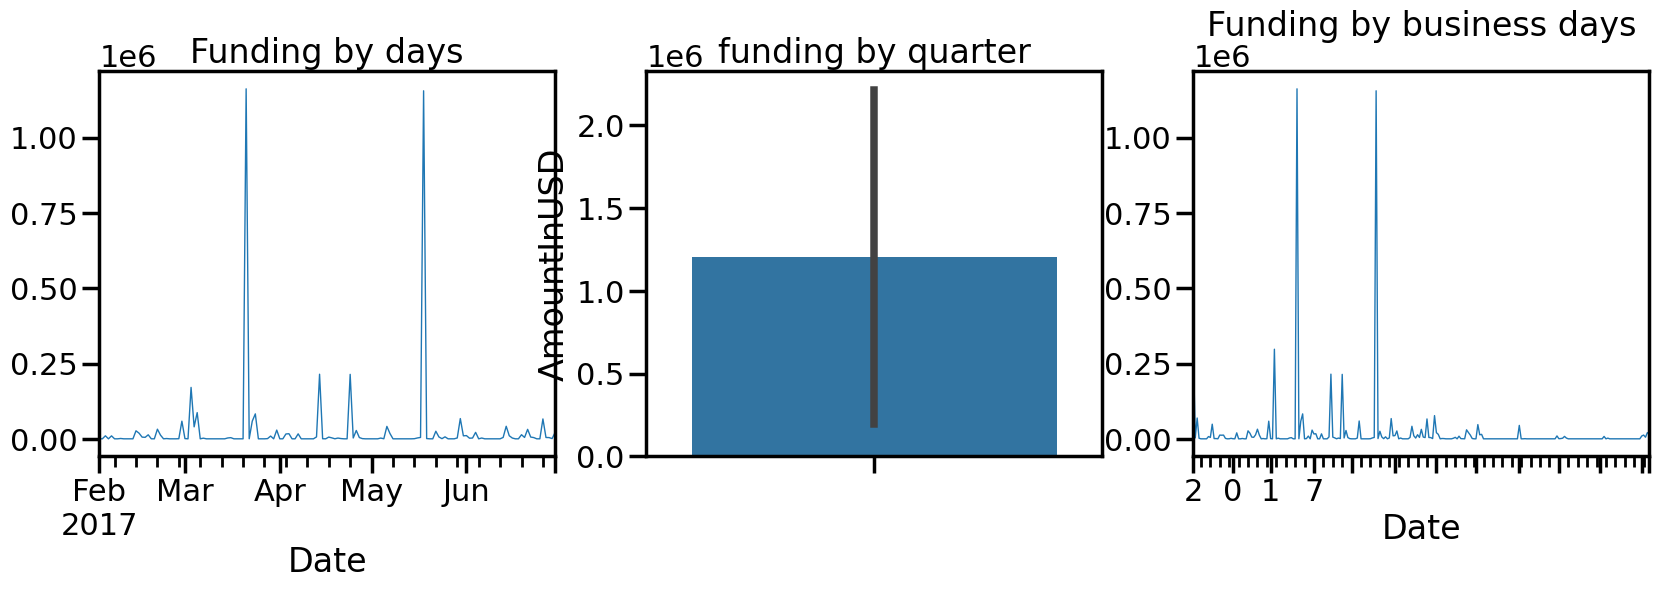

In [170]:
sns.set_context('poster', font_scale = 1 )

plt.figure(figsize = (20,6))

a = dnewdf['2017'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('Total funding in 2017')

fig, axes = plt.subplots(nrows = 1, ncols = 3 ,figsize = (20,5))
a1 = dnewdf['2017-02':'2017-6'].resample('d')['AmountInUSD'].sum().fillna(method = 'ffill').plot(ax = axes[0], lw = 1)
a1.set_title('Funding by days')

#a2 = sns.barplot(data = dnewdf['2017'].resample('Q').sum().reset_index(), y = 'AmountInUSD', x= ['Q1','Q2','Q3'], ax = axes[1])
#a2.set_title('Funding by quarter')

a2= sns.barplot(data= dnewdf['2017'].resample('Q').sum().reset_index(),y = 'AmountInUSD',ax=axes[1])
a2.set_title('funding by quarter')

a3 = dnewdf['2017'].resample('B')['AmountInUSD'].sum().plot(ax = axes[2],lw = 1 )
a3.set_title('Funding by business days')
a3.set_xticklabels('2017')
plt.show()

In [178]:
dnewdf.resample('Q').sum()['AmountInUSD'].astype('int')

<ipython-input-178-ed243fbcb8d2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Date
2015-03-31    1627412
2015-06-30    1100925
2015-09-30    3089013
2015-12-31    1337726
2016-03-31     911194
2016-06-30     499188
2016-09-30     969454
2016-12-31     778336
2017-03-31    2301370
2017-06-30    2131696
2017-09-30     293462
2017-12-31      96647
Name: AmountInUSD, dtype: int64

<ipython-input-176-af4b3a41c455>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-176-af4b3a41c455>:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-176-af4b3a41c455>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




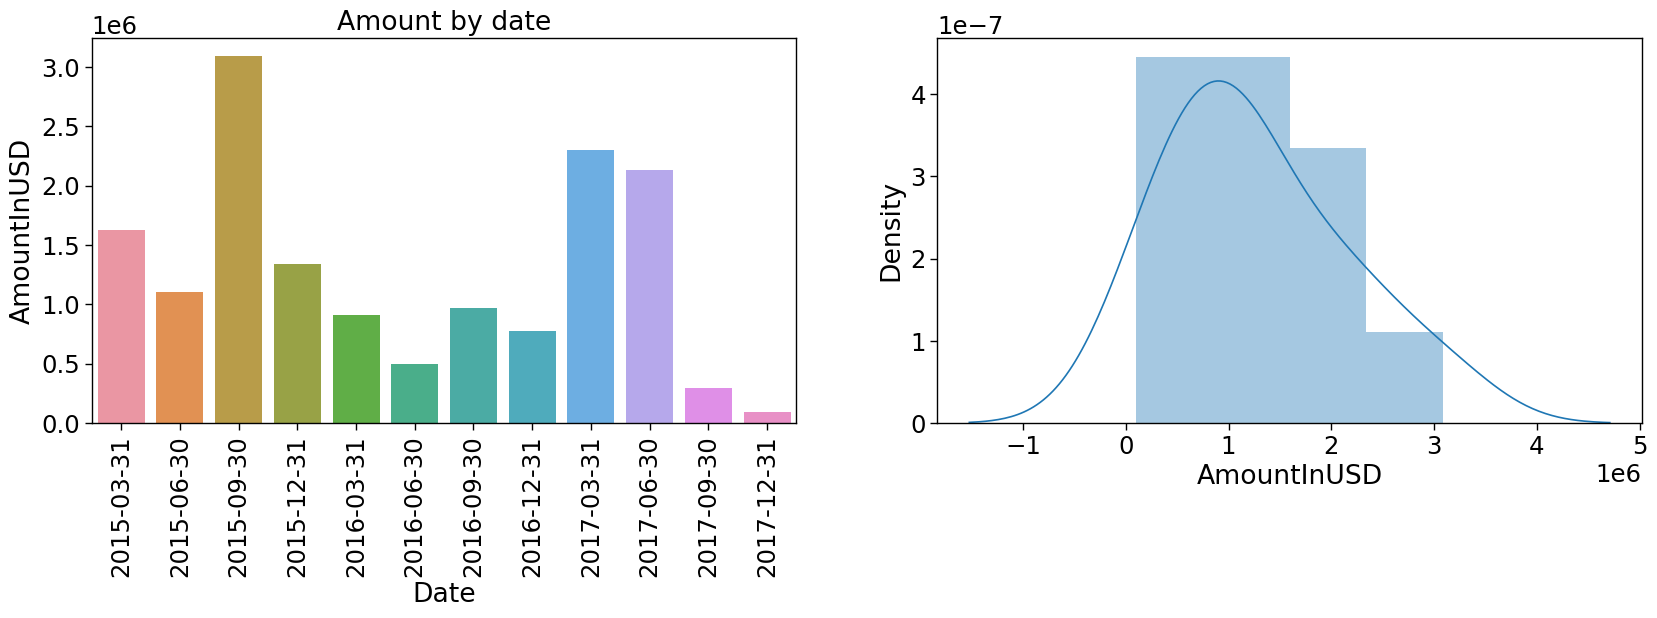

In [176]:
fig, ax = plt.subplots(1,2,figsize = (20,5))

sns.set_context('paper', font_scale = 2 )
dft = dnewdf.resample('Q').sum()
dft.index = dft.reset_index()['Date'].apply(lambda x:x.date())
a = sns.barplot(data = dft.reset_index(), x = 'Date', y = 'AmountInUSD', ax = ax[0])

plt.sca(ax[0])
plt.xticks(rotation = 90 )
plt.title('Amount by date')

sns.distplot(dnewdf.resample('q').sum()['AmountInUSD'], ax = ax[1])
plt.show()

## Quaterly variation in Funding Amount

Quarter Date
2015-03-31    1627412
2015-06-30    1100925
2015-09-30    3089013
2015-12-31    1337726
2016-03-31     911194
2016-06-30     499188
2016-09-30     969454
2016-12-31     778336
2017-03-31    2301370
2017-06-30    2131696
2017-09-30     293462
2017-12-31      96647
Name: AmountInUSD, dtype: int64 12


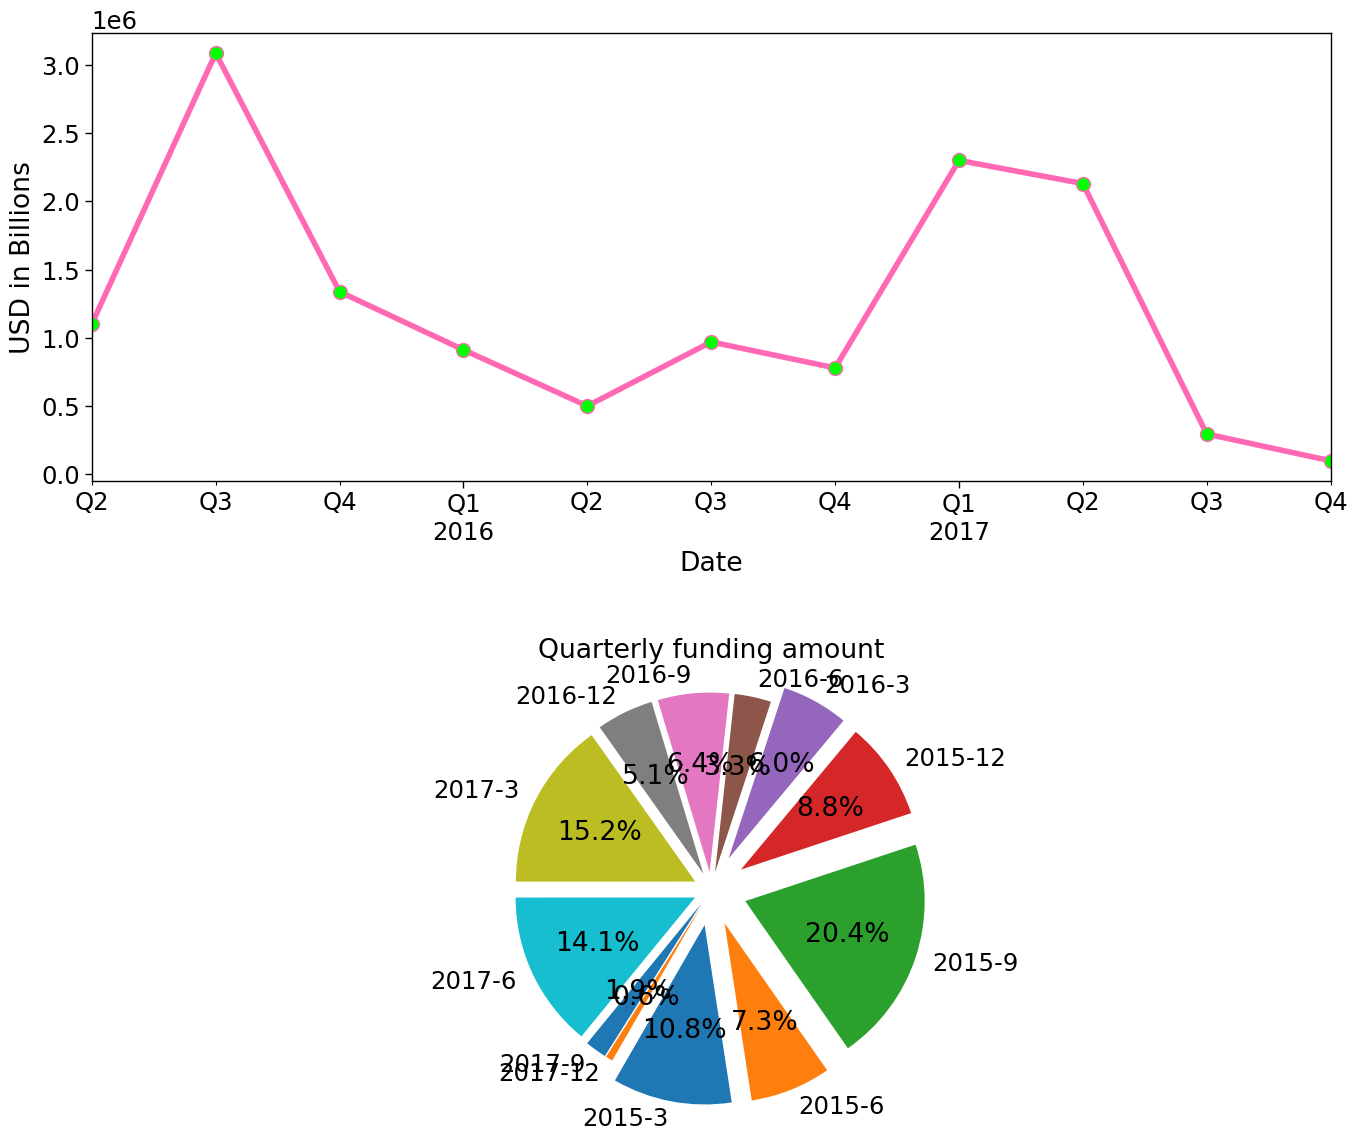

In [195]:
fig, ax = plt.subplots(nrows = 2 , ncols = 1)
fig.set_figheight(13)
fig.set_figwidth(15)
ax[0].set_ylabel('USD in Billions')
quarter = dnewdf['AmountInUSD'].resample('Q').sum().astype('int')
quarter[1:].plot(linewidth = 4 , color = 'hotpink', marker = "o", markersize = 10 , markerfacecolor = 'lime', ax = ax[0])
fig.tight_layout(pad = 3)
plt.title('Quarterly funding amount')
explodes = (0.2,0.2, 0.2, 0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
print("Quarter",quarter[0:], len(quarter[0:]))

ax[1].pie(quarter[0:], autopct = '%1.1f%%', startangle = 240, explode = explodes ,
          labels=['2015-3','2015-6','2015-9','2015-12','2016-3','2016-6','2016-9','2016-12','2017-3','2017-6','2017-9','2017-12'])
plt.show()

In [203]:
#plt.scatter(x = df2['AmountInUSD'], y = df2['InvestmentType'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2371
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2371 non-null   datetime64[ns]
 1   StartupName        2372 non-null   object        
 2   IndustryVertical   2372 non-null   object        
 3   SubVertical        1436 non-null   object        
 4   CityLocation       2372 non-null   object        
 5   InvestorsName      2372 non-null   object        
 6   InvestmentType     2371 non-null   object        
 7   AmountInUSD        2372 non-null   float64       
 8   Year               2371 non-null   float64       
 9   Month              2371 non-null   float64       
 10  numberofinvestors  2372 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 286.9+ KB


<ipython-input-201-f79848bd1aef>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-201-f79848bd1aef>:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-201-f79848bd1aef>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



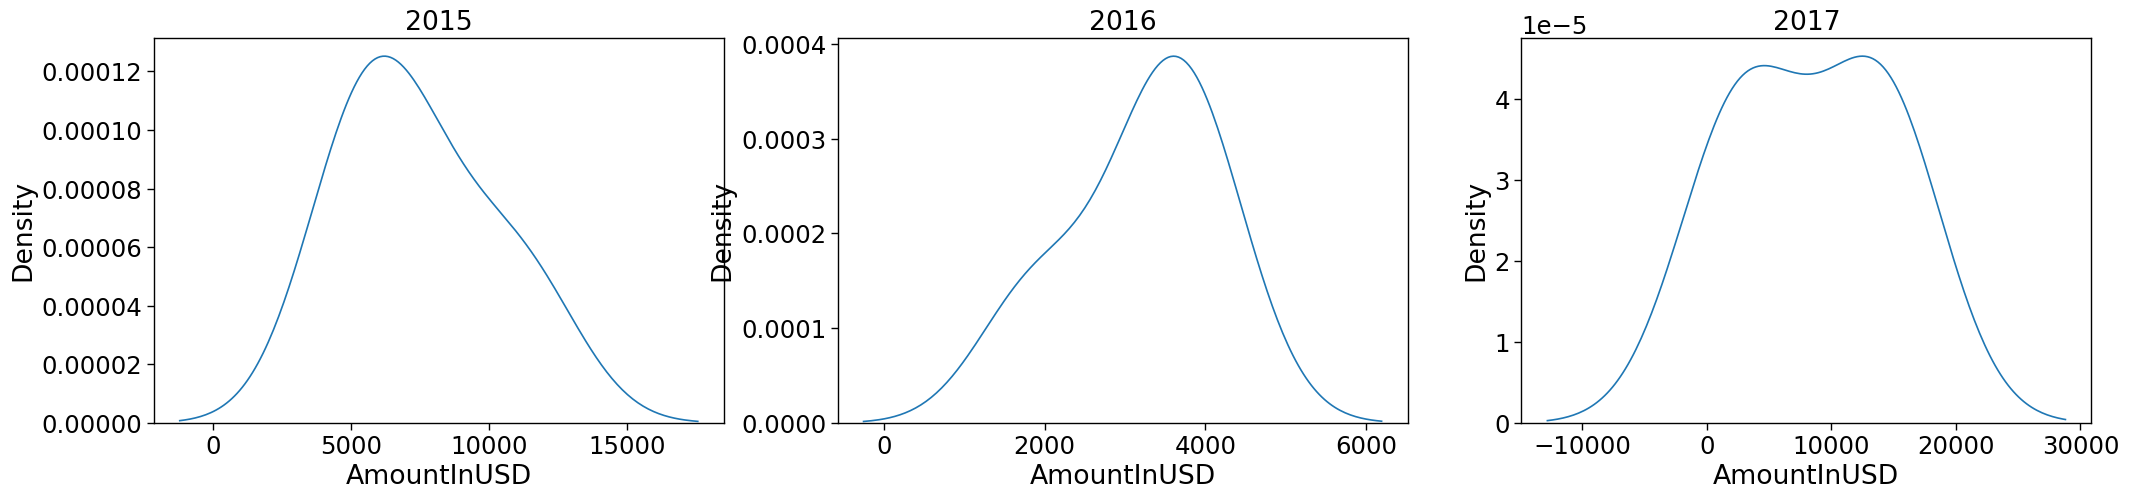

In [201]:
fig, axes = plt.subplots(nrows = 1 , ncols = 3 , figsize = (25,5))

plt.sca(axes[0])
plt.title('2015')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2015'],ax = axes[0])

#dnewdf.resample('q').mean()['AmountInUSD']['2015']

plt.sca(axes[1])
plt.title('2016')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2016'], ax = axes[1])

plt.sca(axes[2])
plt.title('2017')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2017'], ax = axes[2])

plt.show()

#### Investment type in 2015

Private equity is more dispersed according to amount funded
and more amount is invested through private equity per startup on the otherhand seed funding is less dispersed according to amount funded and low amount is funded using this but frequency of seed funding is more as compared to private equity
No dept funding occured in 2015

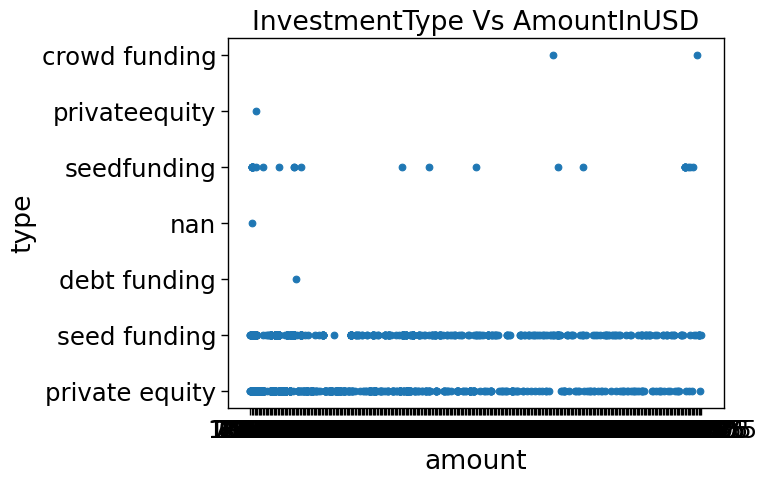

In [208]:
plt.scatter(x = df2['AmountInUSD'].astype('str'), y = df2['InvestmentType'].astype('str'))
plt.title('InvestmentType Vs AmountInUSD')
plt.xlabel('amount')
plt.ylabel('type')
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2371
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2371 non-null   datetime64[ns]
 1   StartupName        2372 non-null   object        
 2   IndustryVertical   2372 non-null   object        
 3   SubVertical        1436 non-null   object        
 4   CityLocation       2372 non-null   object        
 5   InvestorsName      2372 non-null   object        
 6   InvestmentType     2371 non-null   object        
 7   AmountInUSD        2372 non-null   float64       
 8   Year               2371 non-null   float64       
 9   Month              2371 non-null   float64       
 10  numberofinvestors  2372 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 286.9+ KB


<ipython-input-222-9711756ee2dc>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Axes(0.125,0.11;0.775x0.77)
seed funding      468
private equity    434
seedfunding        30
crowd funding       2
privateequity       1
Name: InvestmentType, dtype: int64


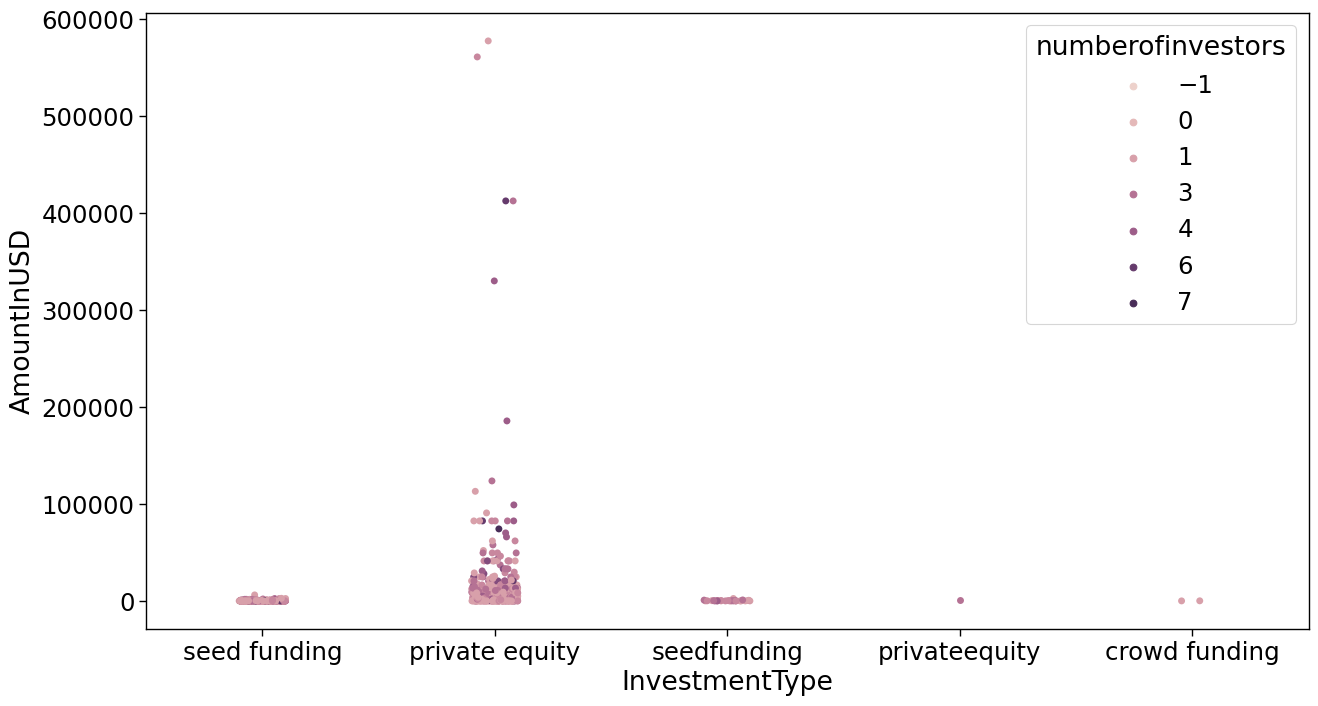

In [222]:
plt.figure(figsize = (15,8))
d2015 = dnewdf['2015']
d2015
print(sns.stripplot(data = d2015, x = 'InvestmentType', y = 'AmountInUSD', jitter = True,hue = 'numberofinvestors'))
print(d2015['InvestmentType'].value_counts())
plt.show()

In [220]:
d2015[d2015['InvestmentType'] == 'privateequity'].sort_values(by = 'AmountInUSD', ascending = False).head(5)

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month,numberofinvestors
Date,,,,,,,,,,
2015-06-01,Tookitaki,other,NaN,notspecific,"Jungle Ventures, Redbright Partners, Blume Ven...",privateequity,825.0,2015.0,6.0,3


#### Private equity is more dispersed according to amount funded and more amount is invested through private equity per startup on the otherhand seed funding is less dispersed according to amount funded and low amount is funded using this but frequency of seed funding is more as compared to private equity

As compared to 2015v seed funding has slightly more deviated

No dept funding and crowd funding occured in 2016
Snapdeal and makemytrip was funded most via private equity

In [225]:
plt.figure(figsize = (15,8))
d2016 = dnewdf['2016']
#sns.stripplot(data = d2016 , x= 'InvestmentType', y  ='AmountInUSD', jitter = True, hue = 'numberofinvestors')
#print(sns.stripplot(data = d2015, x = 'InvestmentType', y = 'AmountInUSD', jitter = True,hue = 'numberofinvestors'))

<ipython-input-225-7ea908e007cb>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



<Figure size 1500x800 with 0 Axes>

In [ ]:
#df2[df2['SNo'] == 102]
#df2.head(2)
df2.iloc[102].to_frame()

,102
Date,2017-06-26 00:00:00
StartupName,V Resorts
IndustryVertical,consumer internet
SubVertical,holiday & vacation resort aggregator
CityLocation,noida
InvestorsName,"Seedfund, RB International"
InvestmentType,private equity
AmountInUSD,3300.0
Year,2017.0
Month,6.0


In [ ]:
df2[df2['InvestorsName'] == 'empty']
df2[df2['numberofinvestors'] == -1]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month,numberofinvestors
SNo,,,,,,,,,,,
12,2017-06-07,MyCity4kids,consumer internet,parenting blog and kids’ events discovery plat...,gurgaon,None,seed funding,0.0,2017.0,6.0,-1
171,2017-05-29,Cube Consumer Services,consumer internet,finance management mobile app,mumbai,None,seed funding,0.0,2017.0,5.0,-1
1441,2015-01-12,Zapluk,health wellness & beauty services app,NaN,hyderabad,None,seed funding,0.0,2015.0,1.0,-1
1532,2015-03-11,LoanBaba,online loans marketplace,NaN,mumbai,None,seed funding,264.0,2015.0,3.0,-1
1606,2015-11-27,JustRide,self driven rental car platform,NaN,mumbai,None,private equity,1650.0,2015.0,11.0,-1
1736,2015-11-09,Zapyle,pre-used apparel shopping mobile app,NaN,bangalore,None,seed funding,825.0,2015.0,11.0,-1
2018,2015-05-06,kWatt Solutions,renewable energy solutions,NaN,mumbai,None,seed funding,412.5,2015.0,5.0,-1
2140,2015-04-04,KeepTrax,location based app,NaN,dallas,None,seed funding,825.0,2015.0,4.0,-1


In [ ]:
df2['InvestorsName'].unique

<bound method Series.unique of SNo
0                                             Kae Capital
1                              Triton Investment Advisors
2       Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3       Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                          Narottam Thudi, Shireesh Palle
                              ...                        
2367                          Asia Pacific Internet Group
2368                                       KARSEMVEN Fund
2369                       Exfinity Fund, GrowX Ventures.
2370                                           MakeMyTrip
2371                    UK based Group of Angel Investors
Name: InvestorsName, Length: 2372, dtype: object>